# Session – 5: Numerical Computation of MLE and Inference Problems

## Tutorial - 5

### A)

In [35]:
# Part (a)

mu_0 = 0 
n = 5
c = 0.5
count_reject_H0 = 0
sample = np.random.normal(mu_0, 1, n)
sample_mean = np.mean(sample)

reject_H0 = sample_mean > c
reject_H0

False

Approximate Type I error probability for c = 0.5: 0.109
Optimal c value for alpha = 0.1: 0.6161616161616161


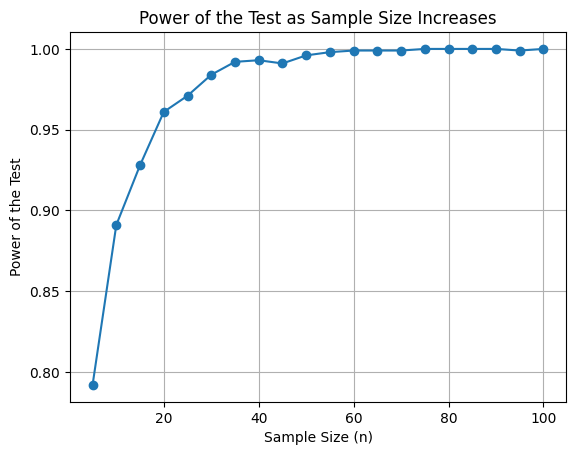

In [38]:
import numpy as np

# Part  (b)
def simulate_test(mu, n, c, M):
    count_reject_H0 = 0
    for _ in range(M):
        sample = np.random.normal(mu, 1, n)
        sample_mean = np.mean(sample)
        if sample_mean > c:
            count_reject_H0 += 1
    return count_reject_H0 / M

# Fixed parameters for part (b)
mu0 = 0
n = 5
c = 0.5
M = 1000

# Simulate under H0
prob_type_I_error = simulate_test(mu0, n, c, M)
print(f"Approximate Type I error probability for c = {c}: {prob_type_I_error}")

# Part (c)
c_values = np.linspace(-1, 4, 100)
type_I_errors = [simulate_test(mu0, n, c, M) for c in c_values]

# Find the value of c that gives a Type I error probability close to 0.1
alpha = 0.1
c_optimal = c_values[np.argmin(np.abs(np.array(type_I_errors) - alpha))]
print(f"Optimal c value for alpha = {alpha}: {c_optimal}")


# Part (d)
# we know power function is rejecting H0 when H1 is true

mu1 = 1
sample_sizes = np.arange(5, 101, 5)
powers = [simulate_test(mu1, n, c_optimal, M) for n in sample_sizes]

# Display results
import matplotlib.pyplot as plt

plt.plot(sample_sizes, powers, marker='o')
plt.xlabel('Sample Size (n)')
plt.ylabel('Power of the Test')
plt.title('Power of the Test as Sample Size Increases')
plt.grid(True)
plt.show()

# print(f"Power of the test for different sample sizes:\n{list(zip(sample_sizes, powers))}")


### B)

#### a) 

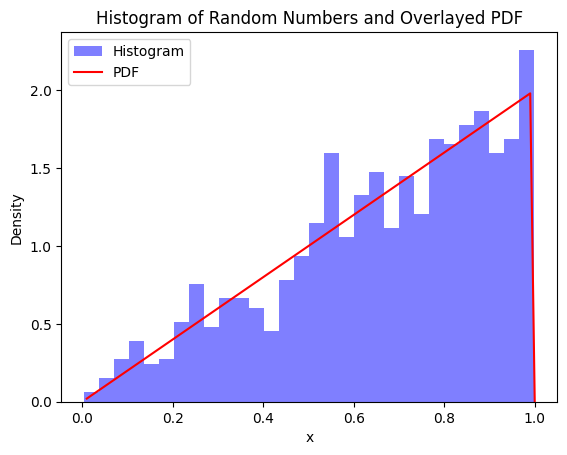

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 1000
theta = 2

# Generate n random numbers from a uniform distribution
U = np.random.uniform(0, 1, n)

# Compute the corresponding random numbers from the given PDF using the inverse transform
X = (U ** (1/theta))

# Define the PDF function
def pdf(x, theta):
    return np.where((0 < x) & (x < 1), theta * x**(theta-1), 0)

# Plot histogram
plt.hist(X, bins=30, density=True, alpha=0.5, color='blue', label='Histogram')

# Overlay PDF
x_values = np.linspace(0.01, 1, 100)
y_values = pdf(x_values, theta)
plt.plot(x_values, y_values, color='red', label='PDF')

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of Random Numbers and Overlayed PDF')
plt.legend()
plt.show()


#### b)

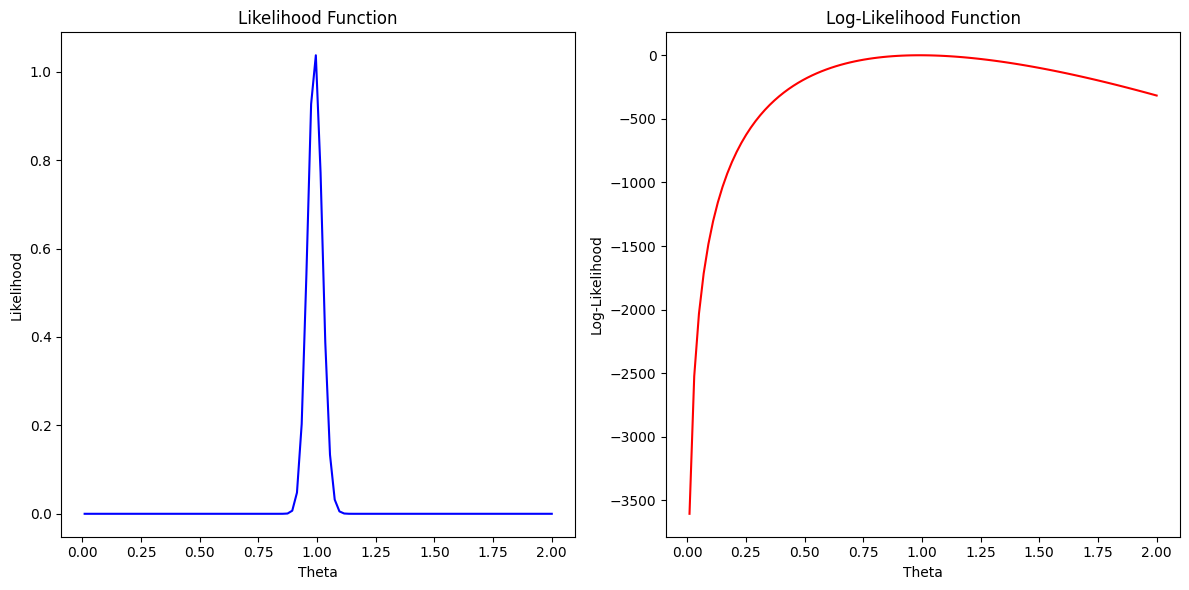

Maximum Likelihood Estimate (Analytical): 2.080815204153384
Maximum Likelihood Estimate (Numerical): 2.080815180777947


In [121]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

theta = 2
# Define the likelihood function
def likelihood(theta,x):
    product = np.prod(pdf(x,theta))
    return product

# Define the log-likelihood function
def log_likelihood(theta, x):
    return np.log(np.prod(pdf(x,theta)))

# Define the log-likelihood function
def neg_log_likelihood(theta, x):
    return -np.log(np.prod(pdf(x,theta)))


n = 1000

# Generate n random numbers from a uniform distribution
U = np.random.uniform(0, 1, n)

# Compute the corresponding random numbers from the given PDF using the inverse transform
sample_data = (U ** (1/theta))

# Find the maximum likelihood estimate numerically
result = minimize(neg_log_likelihood, x0=1, args=(sample_data,))
theta_hat_numerical = result.x[0]


# Find the maximum likelihood estimate analytically
theta_hat_analytical = - (n / np.sum(np.log(sample_data)))

# Plot likelihood function
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(theta_range, likelihood_values, color='blue')
plt.title('Likelihood Function')
plt.xlabel('Theta')
plt.ylabel('Likelihood')

# Plot log-likelihood function
plt.subplot(1, 2, 2)
plt.plot(theta_range, log_likelihood_values, color='red')
plt.title('Log-Likelihood Function')
plt.xlabel('Theta')
plt.ylabel('Log-Likelihood')

plt.tight_layout()
plt.show()

print("Maximum Likelihood Estimate (Analytical):", theta_hat_analytical)
print("Maximum Likelihood Estimate (Numerical):", theta_hat_numerical)


#### c)

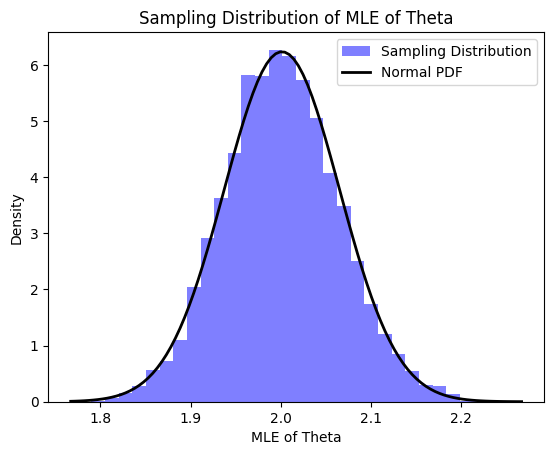

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

M = 10**4  # Number of replications
n = 1000  # Sample size
theta = 2  # True value of theta

MLE_theta = []

# Generate M replications
for _ in range(M):
    # Generate a sample and compute the MLE for each replication
    sample_data = np.random.uniform(0, 1, n) ** (1 / theta)
    mle = - (n / np.sum(np.log(sample_data)))
    MLE_theta.append(mle)

# Plot histogram of MLE values
plt.hist(MLE_theta, bins=30, density=True, alpha=0.5, color='blue', label='Sampling Distribution')

# Fit a normal distribution to the MLE values
mu, std = norm.fit(MLE_theta) # finds mean and std you can use np.mean and np.std
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal PDF')

plt.xlabel('MLE of Theta')
plt.ylabel('Density')
plt.title('Sampling Distribution of MLE of Theta')
plt.legend()
plt.show()


#### d)

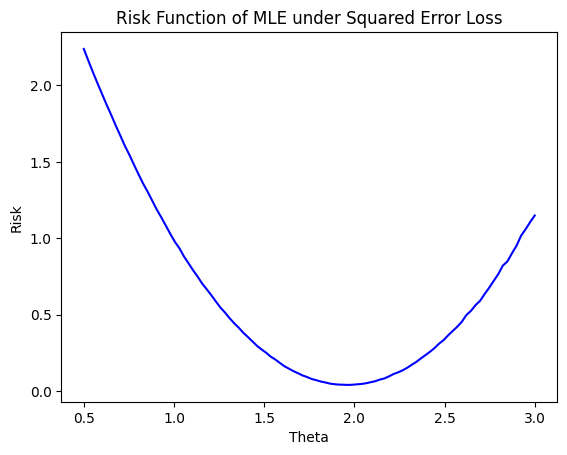

In [142]:
import numpy as np
import matplotlib.pyplot as plt

M = 10**4  # Number of replications
n = 100    # Sample size
theta_range = np.linspace(0.5, 3, 100)  # Range of theta values
true_theta = 2  # True value of theta

# Initialize an array to store the risk values for each theta
risk_values = []

# Generate M replications
for theta in theta_range:
    squared_errors = []
    for _ in range(M):
        # Generate a sample and compute the MLE for each replication
        sample_data = np.random.uniform(0, 1, n) ** (1 / theta)
        mle = - (n / np.sum(np.log(sample_data)))
        # Calculate squared error
        squared_error = (mle - true_theta)**2
        squared_errors.append(squared_error)
    # Compute the average squared error (risk) for the current theta
    risk = np.mean(squared_errors)
    risk_values.append(risk)

# Plot the risk function

####plotted it for 0 to 3 instead of 0 to 2, you can change it as per your wish


plt.plot(theta_range, risk_values, color='blue')
plt.xlabel('Theta')
plt.ylabel('Risk')
plt.title('Risk Function of MLE under Squared Error Loss')
plt.show()


#### e)

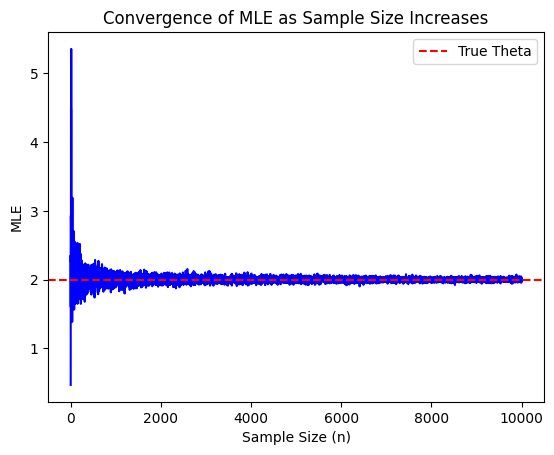

In [149]:
import numpy as np

M = 10**4  # Number of replications
theta = 2  # True value of theta

# Initialize an array to store the MLE values for different sample sizes
MLE_values = []


for n in range(1,M):
    sample_data = np.random.uniform(0, 1, n) ** (1 / theta)
    mle = - (n / np.sum(np.log(sample_data)))
    MLE_values.append(mle)
    
# Plot the MLE mean for different sample sizes
import matplotlib.pyplot as plt

plt.plot(range(1,M), MLE_values, color='blue')
plt.axhline(y=theta, color='red', linestyle='--', label='True Theta')
plt.xlabel('Sample Size (n)')
plt.ylabel('MLE')
plt.title('Convergence of MLE as Sample Size Increases')
plt.legend()
plt.show()


#### f)

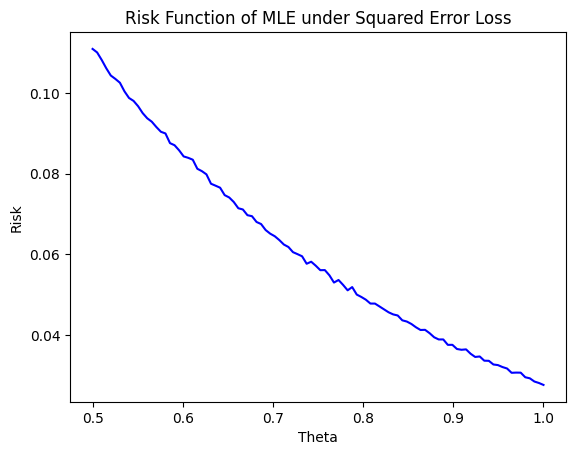

In [151]:
import numpy as np
import matplotlib.pyplot as plt

M = 10**3  # Number of replications
n = 100    # Sample size
theta_range = np.linspace(0.5, 1, 100)  # Range of theta values
true_theta = 2  # True value of theta
true_mu =  true_theta / (1+true_theta)

# Initialize an array to store the risk values for each theta
risk_values = []

# Generate M replications
for theta in theta_range:
    squared_errors = []
    for _ in range(M):
        # Generate a sample and compute the MLE for each replication
        sample_data = np.random.uniform(0, 1, n) ** (1 / theta)
        mle = - (n / np.sum(np.log(sample_data)))
        mu = mle / (1+mle)
        # Calculate squared error
        squared_error = (mu - true_mu)**2
        squared_errors.append(squared_error)
    # Compute the average squared error (risk) for the current theta
    risk = np.mean(squared_errors)
    risk_values.append(risk)

# Plot the risk function

####plotted it for 0 to 3 instead of 0 to 2, you can change it as per your wish


plt.plot(theta_range, risk_values, color='blue')
plt.xlabel('Theta')
plt.ylabel('Risk')
plt.title('Risk Function of MLE under Squared Error Loss')
plt.show()


### C)

#### a)

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.optimize import minimize

# Parameters
n = 50  # Sample size
a_true = 5  # True value of parameter a

# Generate random sample from Beta(a_true, 3)
x = np.random.beta(a_true, 3, size=n)


#### b)

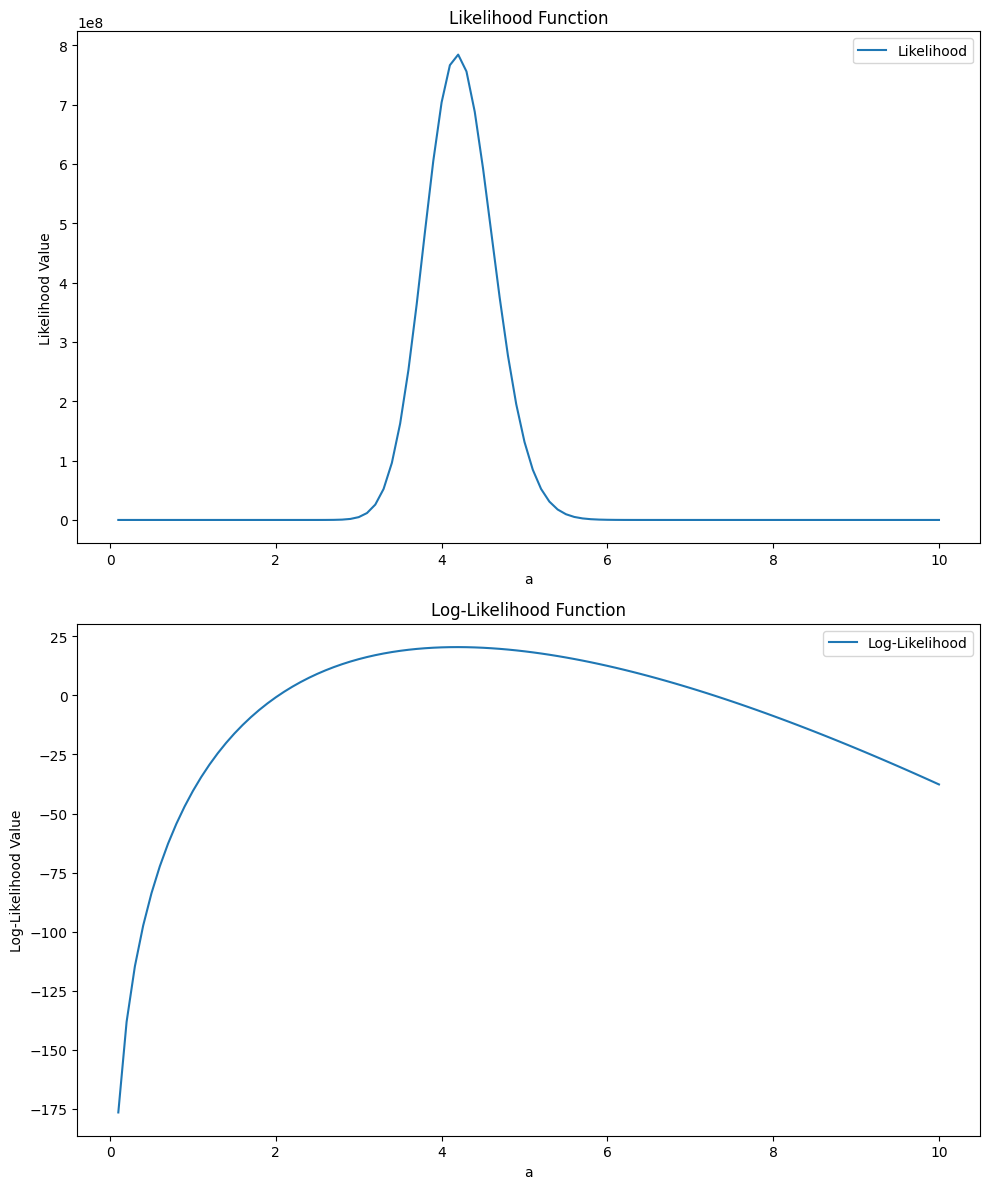

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

def likelihood(a, x):
    return np.prod(beta.pdf(x, a, 3))

def log_likelihood(a, x):
    return np.sum(np.log(beta.pdf(x, a, 3)))

# Parameters
n = 50  # Sample size
a_true = 5  # True value of parameter a

# Generate random sample from Beta(a_true, 3)
x = np.random.beta(a_true, 3, size=n)

# Range of 'a' values
a_vals = np.linspace(0.1, 10, 100)

# Calculate likelihood and log-likelihood values
likelihood_vals = [likelihood(a, x) for a in a_vals]
log_likelihood_vals = [log_likelihood(a, x) for a in a_vals]

# Plot likelihood and log-likelihood functions
plt.figure(figsize=(10, 12))

# Likelihood plot
plt.subplot(2, 1, 1)
plt.plot(a_vals, likelihood_vals, label='Likelihood')
plt.xlabel('a')
plt.ylabel('Likelihood Value')
plt.title('Likelihood Function')
plt.legend()

# Log-likelihood plot
plt.subplot(2, 1, 2)
plt.plot(a_vals, log_likelihood_vals, label='Log-Likelihood')
plt.xlabel('a')
plt.ylabel('Log-Likelihood Value')
plt.title('Log-Likelihood Function')
plt.legend()

plt.tight_layout()  # Adjust subplot layout for better spacing
plt.show()



#### c)

In [156]:
# Define negative log-likelihood function
def neg_log_likelihood(a, x):
    return -log_likelihood(a, x)

# Perform maximum likelihood estimation (MLE) to find a_hat
result = minimize(neg_log_likelihood, x0=1.0, args=(x,), method='BFGS')
a_hat = result.x[0]

# Compute observed Fisher Information at a_hat
hessian = result.hess_inv
observed_fisher_info = hessian[0, 0]
print("MLE of a (a_hat):", a_hat)
print("Observed Fisher Information at a_hat:", observed_fisher_info)


MLE of a (a_hat): 4.187737653838679
Observed Fisher Information at a_hat: 0.166229182285557


#### d)

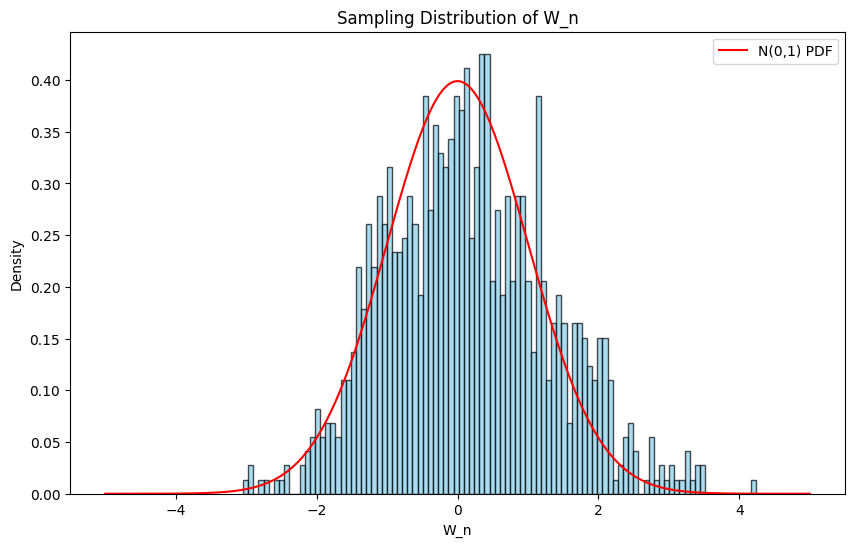

In [158]:
from scipy.stats import norm

M = 10**3
a_hat_samples = []
for _ in range(M):
    # Generate new sample
    x = np.random.beta(a_true, 3, size=n)
    
    # Perform MLE
    result = minimize(neg_log_likelihood, x0=1.0, args=(x,), method='BFGS')
    a_hat = result.x[0]
    
    # Compute W_n
    W_n = (a_hat - a_true) / np.sqrt( observed_fisher_info)
    
    # Collect W_n
    a_hat_samples.append(W_n)

# Plot histogram of W_n and overlay N(0,1) PDF
plt.figure(figsize=(10, 6))
plt.hist(a_hat_samples, bins=100, density=True, alpha=0.7, color='skyblue', edgecolor='black')

# Overlay N(0,1) PDF
x_vals = np.linspace(-5, 5, 1000)
pdf_vals = norm.pdf(x_vals, loc=0, scale=1)
plt.plot(x_vals, pdf_vals, 'r-', label='N(0,1) PDF')

plt.xlabel('W_n')
plt.ylabel('Density')
plt.title('Sampling Distribution of W_n')
plt.legend()
plt.show()


## Handout - 5

### One Parameter Optimization

#### a)

The following code performs simulation from the Beta(a,3) density function with specified shape
parameters using R. We simulate a sample of size n and draw the histogram and overlay the exact
density function on it. We are interested in estimating the parameter a and obtain the standard
error associated with the estimation

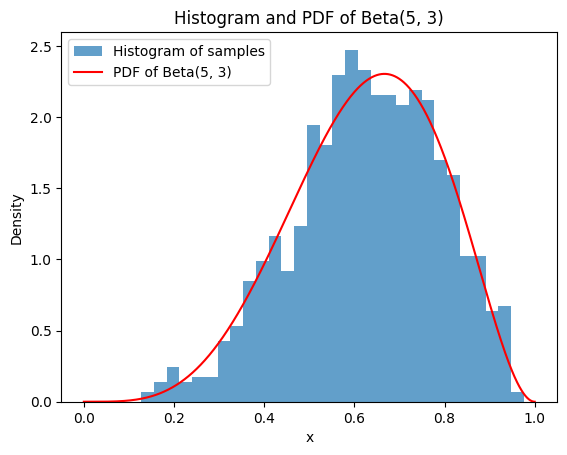

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from math import gamma 

# Parameters for simulation
a = 5    # Shape parameter (alpha) of the beta distribution
n = 1000  # Sample size

# Generate random samples from Beta(a, 3)
x = np.random.beta(a, 3, n)

# Plot the histogram of generated samples
plt.hist(x, density=True, bins=30, alpha=0.7, label='Histogram of samples')

# Define the probability density function (PDF) of Beta(a, 3)
def f(x):
    return np.where((x > 0) & (x < 1),
                    (x**(a-1) * ((1-x)**(3-1))) / (gamma(a) * gamma(3) / gamma(a+3)),
                    0)

# Generate x values for plotting the PDF
x_vals = np.linspace(0, 1, 1000)

# Plot the PDF of Beta(a, 3)
plt.plot(x_vals, f(x_vals), 'r-', label='PDF of Beta(5, 3)')

# Add labels and legend
plt.title('Histogram and PDF of Beta(5, 3)')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


#### b)

Instead of maximizing the likelihood function, we shall minimize the negative of the log-likelihood
function. In the following, we define the negative log-likelihood function −ℓ(a) = − log ℒ(a)
which will be minimized.

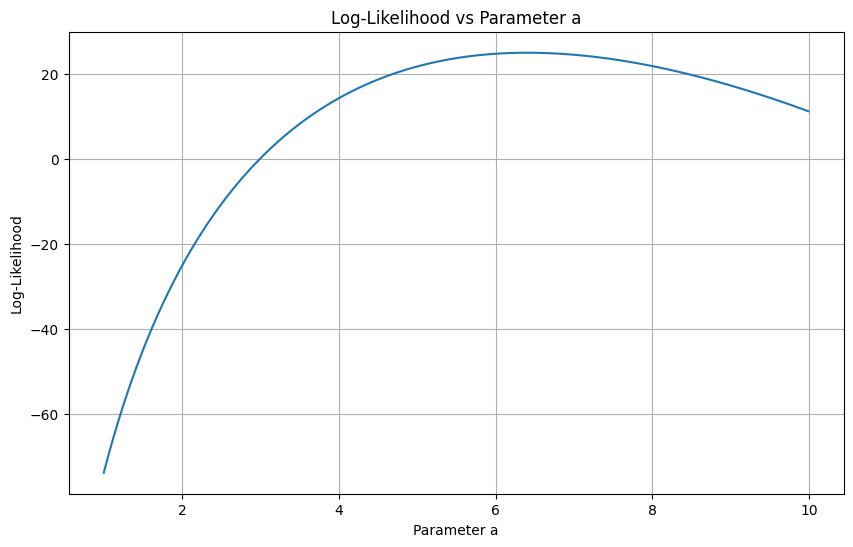

In [125]:
# first we will plot loglik
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(43)
x= np.random.beta(a,3,50)

def loglik(a):
    return sum((a-1)*np.log(x) + 2*np.log(1-x) - np.log((gamma(a) * gamma(3) / gamma(a+3))))


a_vals = np.arange(1, 10, 0.01)

log_vals = []
for i in a_vals:
  log_vals.append(loglik(i))


# Plot the log-likelihood curve
plt.figure(figsize=(10, 6))
plt.plot(a_vals, log_vals)  # Plot maximum log-likelihood value for each 'a'
plt.xlabel('Parameter a')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs Parameter a')
plt.grid(True)
plt.show()


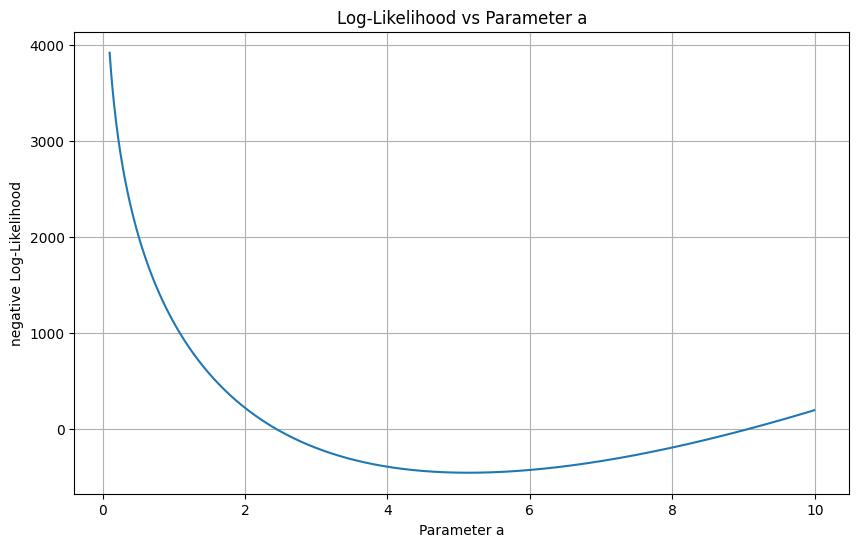

In [133]:
# now we will plot negloglik
import numpy as np
import matplotlib.pyplot as plt

x= np.random.beta(a,3,n)

def negloglik(a):
    return -sum((a-1)*np.log(x) + 2*np.log(1-x) - np.log((gamma(a) * gamma(3) / gamma(a+3))))


a_vals = np.arange(0.1, 10, 0.01)

log_vals = []
for i in a_vals:
  log_vals.append(negloglik(i))


# Plot the log-likelihood curve
plt.figure(figsize=(10, 6))
plt.plot(a_vals, log_vals)  # Plot maximum log-likelihood value for each 'a'
plt.xlabel('Parameter a')
plt.ylabel('negative Log-Likelihood')
plt.title('Log-Likelihood vs Parameter a')
plt.grid(True)
plt.show()



#### c)

Optimization of the negative log likelihood function −ℓ(a) using optim()/eqivalent fucntion in python function and obtain
the estimated standard error associated with the MLE

In [135]:
import numpy as np
import scipy.optimize as spo
from scipy.special import gamma

# Sample data generation
np.random.seed(0)  # For reproducibility
a_true = 5
n = 100
x = np.random.beta(a_true, 3, n)

# Define the negative log-likelihood function
def negloglik(a):
    likelihood_terms = (x**(a-1) * (1-x)**2) / (gamma(a) * gamma(3) / gamma(a+3))
    log_likelihood = np.sum(np.log(likelihood_terms))
    return -log_likelihood

# Initial guess for the optimization
initial_guess = 1.0

# Minimize the negative log-likelihood to find the optimal 'a'
result = spo.minimize(negloglik, initial_guess, method='BFGS')

# Check if optimization was successful
if result.success:
    optimal_a = result.x[0]  # Extract the optimal parameter value
    max_loglik = -result.fun  # Convert back to maximum log-likelihood value
    hessian_inv = result.hess_inv[0][0]
    print(f"Optimal parameter 'a': {optimal_a:.4f}")
    print(f"Maximum log-likelihood value: {max_loglik:.4f}")
    print(f"hessain inverse: {hessian_inv:.4f}")
else:
    print("Optimization failed. Could not find the optimal parameter.")


Optimal parameter 'a': 4.5665
Maximum log-likelihood value: 41.5859
hessain inverse: 0.0966


#### d)

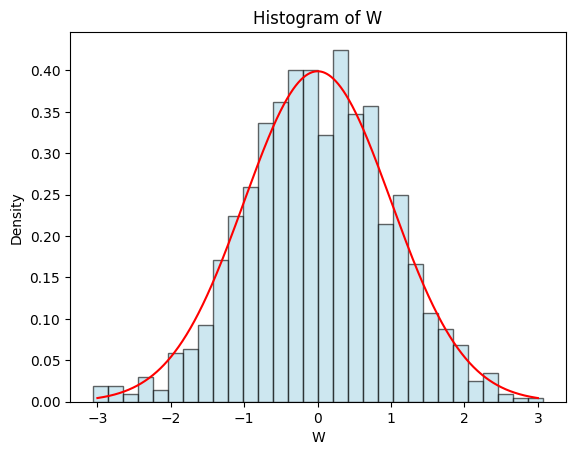

In [313]:
import numpy as np
import scipy.optimize as spo
from scipy.special import gamma

a_true = 5
n = 50
# Define the negative log-likelihood function
def negloglik(a):
    likelihood_terms = (x**(a-1) * (1-x)**2) / (gamma(a) * gamma(3) / gamma(a+3))
    log_likelihood = np.sum(np.log(likelihood_terms))
    return -log_likelihood


M = 1000
W = []

for i in range(M):
    x = np.random.beta(a_true, 3, n)
    initial_guess = [1.0]  # Initial guess for parameter 'a'
    result = spo.minimize(negloglik, initial_guess, method="BFGS")
    a_hat = result.x[0]
    one_by_Fisher_informartion = result.hess_inv[0][0]
    W.append((a_hat - a_true)/ np.sqrt(one_by_Fisher_informartion))

# Plotting the histogram of W
plt.hist(W, bins=30, density=True, alpha=0.6, color='lightblue', edgecolor='black')
norm_x_vals = np.linspace(-3,3,1000)
import scipy.stats as st
plt.plot(norm_x_vals,st.norm.pdf(norm_x_vals),color ='red')
plt.xlabel('W')
plt.ylabel('Density')
plt.title('Histogram of W')
plt.show()


#### e)

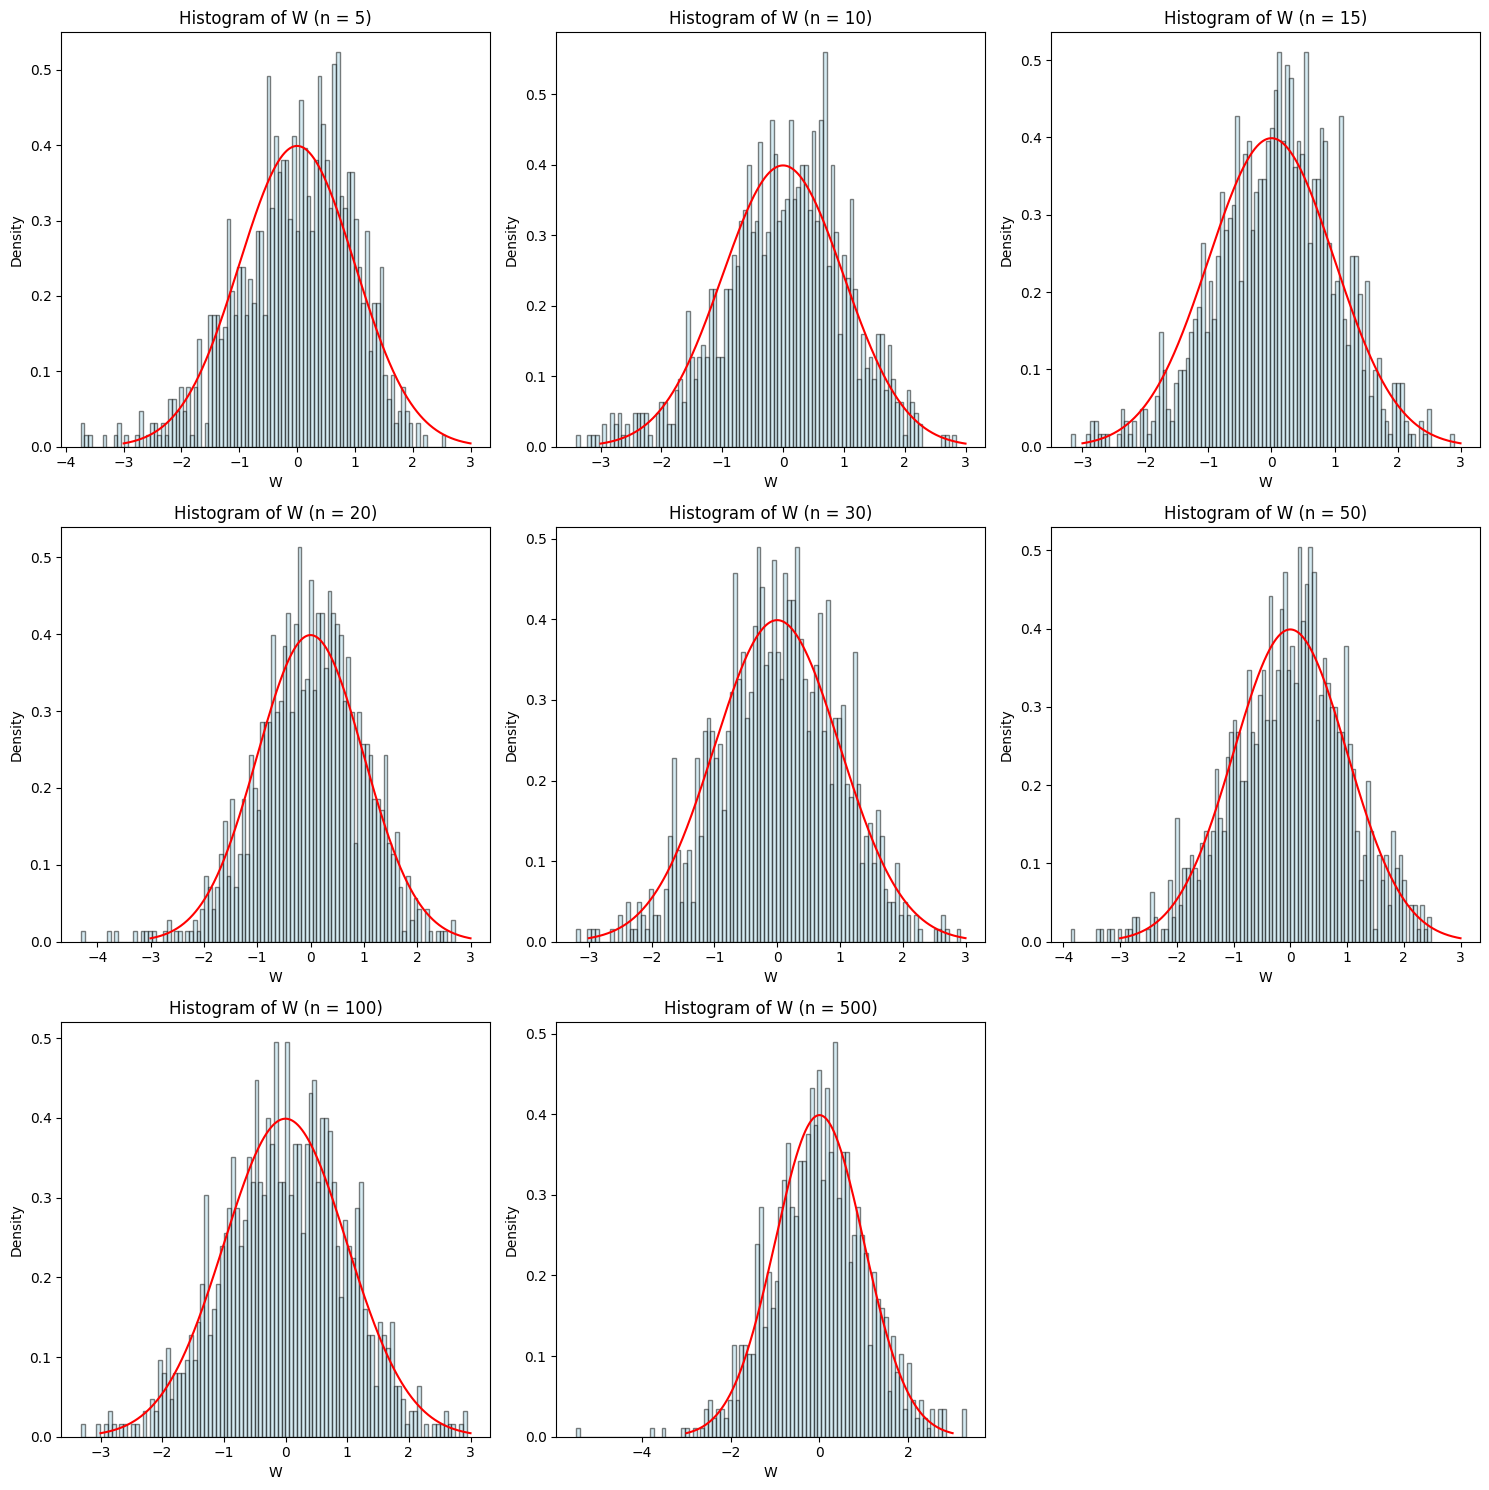

In [138]:
import numpy as np
import scipy.optimize as spo
from scipy.special import gamma
import matplotlib.pyplot as plt
import scipy.stats as st

a_true = 5
n_vals = [5, 10, 15, 20, 30, 50, 100, 500]
M = 1000

# Define the negative log-likelihood function
def negloglik(a, x):
    likelihood_terms = (x**(a-1) * (1-x)**2) / (gamma(a) * gamma(3) / gamma(a+3))
    log_likelihood = np.sum(np.log(likelihood_terms))
    return -log_likelihood

# Initialize figure for plotting
plt.figure(figsize=(15, 15))

# Simulation loop over different sample sizes
for j in range(len(n_vals)):
    n = n_vals[j]
    W = []

    # Generate M samples and estimate W for each sample
    for i in range(M):
        x = np.random.beta(a_true, 3, n)
        initial_guess = [1.0]  # Initial guess for parameter 'a'
        
        # Minimize negative log-likelihood to estimate 'a'
        result = spo.minimize(negloglik, initial_guess, args=(x,), method="BFGS")
        a_hat = result.x[0]
        fisher_information = result.hess_inv[0][0]
        
        # Calculate W statistic
        W.append((a_hat - a_true) / np.sqrt(fisher_information))

    # Plotting the histogram of W for current sample size
    plt.subplot(3, 3, j+1)
    plt.hist(W, bins=100, density=True, alpha=0.5, color='lightblue', edgecolor='black')
    norm_x_vals = np.linspace(-3, 3, 1000)
    plt.plot(norm_x_vals, st.norm.pdf(norm_x_vals), color='red')
    plt.xlabel('W')
    plt.ylabel('Density')
    plt.title(f'Histogram of W (n = {n})')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### Multi-parameter optimization 

#### a)

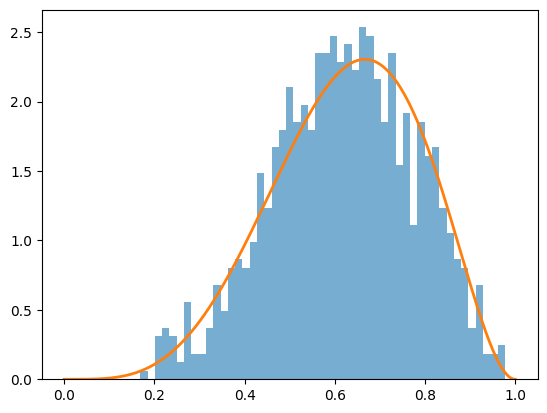

In [141]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Number of random samples to generate
n = 1000

# Parameters for the Beta distribution
a = 5
b = 3

# Generate n random samples from a Beta distribution with parameters a and b
x = np.random.beta(a, b, n)

# Create a histogram of the samples with density=True to normalize the histogram
# and bins=50 to divide the data into 50 bins
plt.hist(x, density=True, bins=50, alpha=0.6)

# Generate 1000 evenly spaced values between 0 and 1 for plotting the Beta distribution
x_vals = np.linspace(0, 1, 1000)

# Plot the theoretical Beta distribution with the same parameters a and b
plt.plot(x_vals, st.beta.pdf(x_vals, a, b), lw=2)

# Display the plot
plt.show()


#### b)

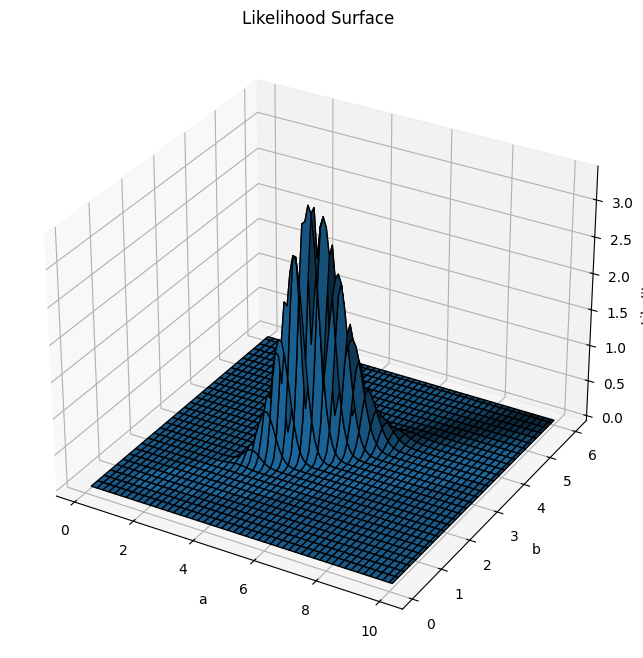

In [146]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting tools
from scipy.special import gamma

a_true = 5
b_true = 3
n = 100
x = np.random.beta(a_true, b_true, n)

# Define the likelihood function
def likelihood(a, b):
    terms = (x**(a-1) * (1-x)**(b-1)) / (gamma(a) * gamma(b) / gamma(a+b))
    return np.prod(terms)

# Define the range of parameters 'a' and 'b'
a_vals = np.linspace(0.1, 10, 100)  # Values of 'a'
b_vals = np.linspace(0.1, 6, 60)     # Values of 'b'

# Creating a meshgrid of 'a' and 'b' values
A, B = np.meshgrid(a_vals, b_vals)

# Calculating likelihood values for each (a, b) pair
likelihood_values = np.zeros_like(A)
for i in range(len(a_vals)):
    for j in range(len(b_vals)):
        likelihood_values[j, i] = likelihood(A[j, i], B[j, i])

# Plotting the 3D surface

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, likelihood_values,edgecolor = 'k')

# Adding labels and title
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Likelihood')
ax.set_title('Likelihood Surface')

plt.show()


#### c)

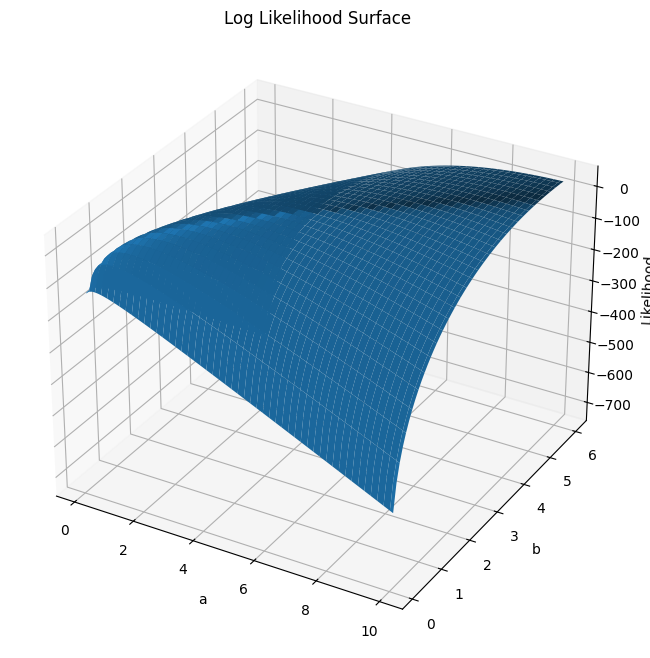

In [145]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting tools
from scipy.special import gamma

a_true = 5
b_true = 3
n = 100
x = np.random.beta(a_true, b_true, n)

# Define the likelihood function
def loglikelihood(a, b):
    terms = (x**(a-1) * (1-x)**(b-1)) / (gamma(a) * gamma(b) / gamma(a+b))
    return np.log(np.prod(terms))

# Define the range of parameters 'a' and 'b'
a_vals = np.linspace(0.1, 10, 100)  # Values of 'a'
b_vals = np.linspace(0.1, 6, 60)     # Values of 'b'

# Creating a meshgrid of 'a' and 'b' values
A, B = np.meshgrid(a_vals, b_vals)

# Calculating likelihood values for each (a, b) pair
loglikelihood_values = np.zeros_like(A)
for i in range(len(a_vals)):
    for j in range(len(b_vals)):
        loglikelihood_values[j, i] = loglikelihood(A[j, i], B[j, i])

# Plotting the 3D surface

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, loglikelihood_values)

# Adding labels and title
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Likelihood')
ax.set_title('Log Likelihood Surface')

plt.show()


#### d) 

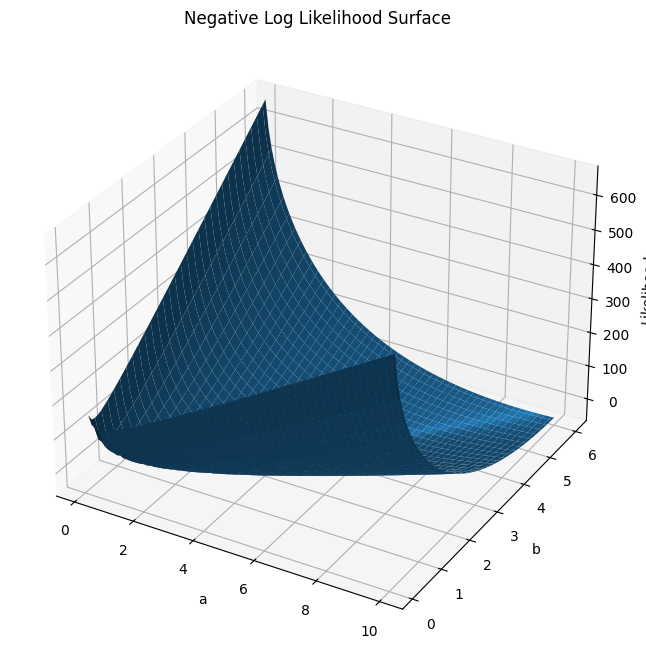

In [147]:
# only plot neg log likelihood function 


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting tools
from scipy.special import gamma

a_true = 5
b_true = 3
n = 100
x = np.random.beta(a_true, b_true, n)

# Define the likelihood function
def neg_loglikelihood(a, b):
    terms = (x**(a-1) * (1-x)**(b-1)) / (gamma(a) * gamma(b) / gamma(a+b))
    return -np.log(np.prod(terms))

# Define the range of parameters 'a' and 'b'
a_vals = np.linspace(0.1, 10, 100)  # Values of 'a'
b_vals = np.linspace(0.1, 6, 60)     # Values of 'b'

# Creating a meshgrid of 'a' and 'b' values
A, B = np.meshgrid(a_vals, b_vals)

# Calculating likelihood values for each (a, b) pair
neg_loglikelihood_values = np.zeros_like(A)
for i in range(len(a_vals)):
    for j in range(len(b_vals)):
        neg_loglikelihood_values[j, i] = neg_loglikelihood(A[j, i], B[j, i])

# Plotting the 3D surface

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, neg_loglikelihood_values)

# Adding labels and title
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Likelihood')
ax.set_title('Negative Log Likelihood Surface')

plt.show()


#### e)

In [381]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting tools
from scipy.special import gamma
import scipy.optimize as spo
import scipy.stats as st


a_true = 5
b_true = 3
n = 100
x = np.random.beta(a_true, b_true, n)


# Define the likelihood function
def negloglik(params):
    a, b = params
    terms = st.beta.logpdf(x, a, b)
    return -np.sum(terms)
    #terms = (x**(a-1) * (1-x)**(b-1)) / (gamma(a) * gamma(b) / gamma(a+b))


# Initial guess for the optimization
initial_guess = [1.0,1.0]

# Minimize the negative log-likelihood to find the optimal 'a' and 'b'
result = spo.minimize(negloglik, initial_guess, method='BFGS')

# Check if optimization was successful
if result.success:
    optimal_params = result.x
    optimal_a, optimal_b = optimal_params
    max_loglik = -result.fun
    hessian_inv = result.hess_inv
    print(f"Optimal parameter 'a': {optimal_a:.4f}")
    print(f"Optimal parameter 'b': {optimal_b:.4f}")
    print(f"Maximum log-likelihood value: {max_loglik:.4f}")
    print(f"Hessian inverse: {hessian_inv}")
else:
    print("Optimization failed. Could not find the optimal parameters.")




Optimal parameter 'a': 4.6576
Optimal parameter 'b': 2.8489
Maximum log-likelihood value: 40.1112
Hessian inverse: [[0.42435996 0.2170817 ]
 [0.2170817  0.14562181]]


#### f)

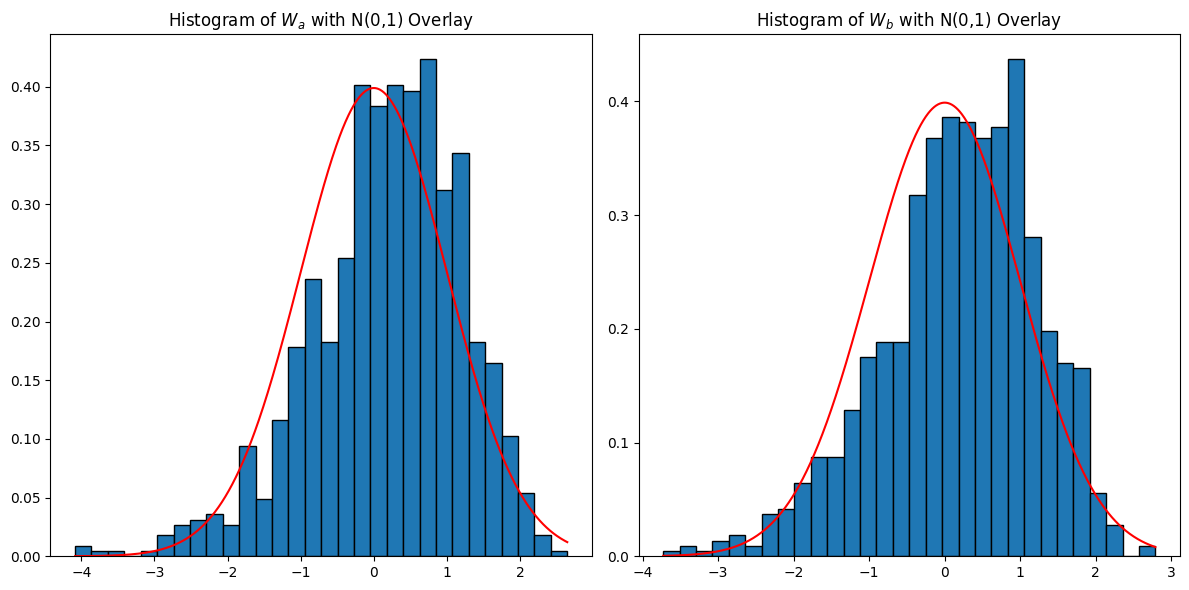

In [382]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
import scipy.stats as st

# Define the negative log-likelihood function for beta distribution
def negloglik(params):
    a, b = params
    terms = st.beta.logpdf(x, a, b)
    return -np.sum(terms)

# Simulation parameters
M = 1000  # Number of simulations
n = 30    # Sample size
a_true = 5
b_true = 3

W_a = []
W_b = []

# Perform M simulations
for i in range(M):
    # Generate a random sample from the true beta distribution
    x = np.random.beta(a_true, b_true, n)

    # Estimate parameters using maximum likelihood estimation
    initial_guess = [1.0, 1.0]
    result = spo.minimize(negloglik, initial_guess, method='BFGS')
    a_hat = result.x[0]
    b_hat = result.x[1]
    
    
    # Compute standard errors using the inverse of the observed Fisher information matrix
    fisherInformation = (result.hess_inv)
    se_a_hat = np.sqrt(fisherInformation[0, 0])
    se_b_hat = np.sqrt(fisherInformation[1, 1])

    # Calculate W_a and W_b
    W_a.append((a_hat - a_true) / se_a_hat)
    W_b.append((b_hat - b_true) / se_b_hat)

# Plot histograms of W_a and W_b with standard normal density overlay
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(W_a, density=True, bins=30, edgecolor='black')
norm_x_vals = np.linspace(np.min(W_a), np.max(W_a), 1000)
plt.plot(norm_x_vals, st.norm.pdf(norm_x_vals), color='red')
plt.title(r'Histogram of $W_a$ with N(0,1) Overlay')

plt.subplot(1, 2, 2)
plt.hist(W_b, density=True, bins=30, edgecolor='black')
norm_x_vals = np.linspace(np.min(W_b), np.max(W_b), 1000)
plt.plot(norm_x_vals, st.norm.pdf(norm_x_vals), color='red')
plt.title(r'Histogram of $W_b$ with N(0,1) Overlay')

plt.tight_layout()
plt.show()


#### g)

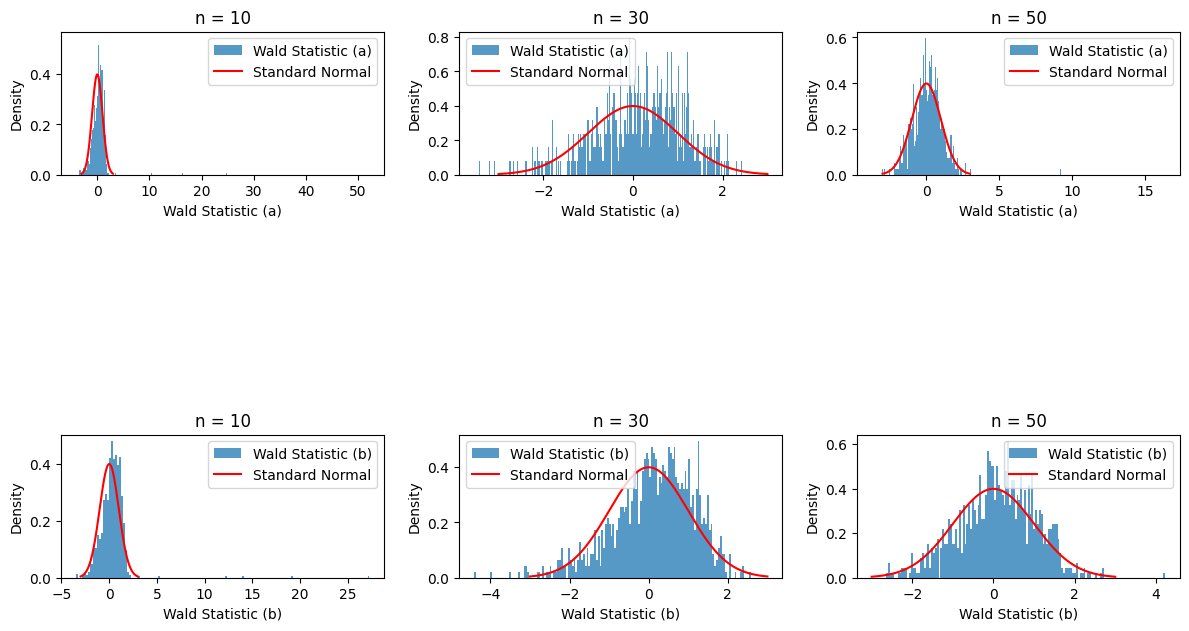

In [317]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
from scipy.special import gamma
import scipy.stats as st

# Parameters
M = 1000
n_vals = [10, 30, 50]#, 100, 200, 250]
a_true = 5
b_true = 3
plt.figure(figsize = (12,8))
# Define the negative log-likelihood function for beta distribution
def negloglik(params, x):
    a, b = params
    terms = st.beta.logpdf(x, a, b)
    return -np.sum(terms)

# Loop over different sample sizes
for i in range(len(n_vals)):
    W_a = []
    W_b = []
    n = n_vals[i]
    
    for _ in range(1, M):
        # Generate beta-distributed data
        x = np.random.beta(a_true, b_true, n)
    
        # Initial guess for the optimization
        initial_guess = [1.0, 1.0]
        
        # Minimize the negative log-likelihood to estimate parameters
        result = spo.minimize(negloglik, initial_guess,args = (x,), method='BFGS')
        a_hat = result.x[0]
        b_hat = result.x[1]
        one_by_fisherInformation = result.hess_inv
        se_a_hat = np.sqrt(one_by_fisherInformation[0, 0])
        se_b_hat = np.sqrt(one_by_fisherInformation[1, 1])
        
        # Calculate Wald statistics for a and b
        W_a.append((a_hat - a_true) / se_a_hat)
        W_b.append((b_hat - b_true) / se_b_hat)
    
    # Plot histogram and standard normal density for Wald statistic of a
    plt.subplot(4, 3, i+1)
    plt.hist(W_a, density=True, bins=500, alpha=0.75, label='Wald Statistic (a)')
    norm_x_vals = np.linspace(-3, 3, 1000)
    plt.plot(norm_x_vals, st.norm.pdf(norm_x_vals), color='red', label='Standard Normal')
    plt.xlabel('Wald Statistic (a)')
    plt.ylabel('Density')
    plt.title(f'n = {n}')
    plt.legend()

    # Plot histogram and standard normal density for Wald statistic of b
    plt.subplot(4, 3, i+7)  # Move to the next row of subplots
    plt.hist(W_b, density=True, bins=150, alpha=0.75, label='Wald Statistic (b)')
    plt.plot(norm_x_vals, st.norm.pdf(norm_x_vals), color='red', label='Standard Normal')
    plt.xlabel('Wald Statistic (b)')
    plt.ylabel('Density')
    plt.title(f'n = {n}')
    plt.legend()

plt.tight_layout()  # Adjust subplot layout for better appearance
plt.show()



### Combining likelihoods

#### a) & b)

Suppose that we are interested in estimating the parameter 𝑎, from the Beta(𝑎, 𝑏) distribution
with known 𝑏. In the following steps of codes, we will obtain the estimate of 𝑎 using the method
of maximum likelihood and check various properties of the MLE of 𝑎, 𝑎̂ (say). Then we will obtain
the MLE of 𝑎, if only some sample characteristics are made available for the estimation. The
complete data is not available for data privacy consideration. How, reliable the MLE is estimating
the parameter 𝑎, we shall check it.    

Simulation of random sample 𝑋1, 𝑋2, ⋯ , 𝑋𝑛 ∼ Beta(𝑎 = 4, 𝑏 = 3)

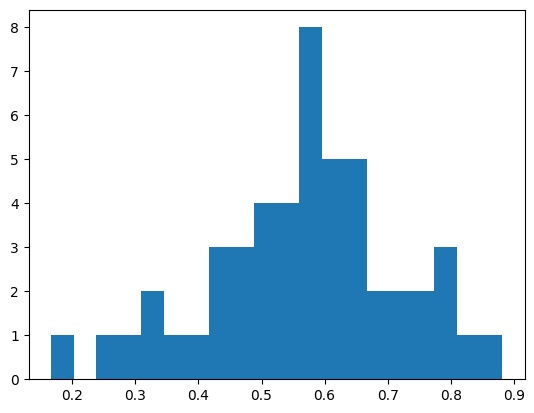

In [387]:
n =50
a= 4
b =3

import numpy as np
x = np.random.beta(a,b,n)
import matplotlib.pyplot as plt
plt.hist(x,bins= 20)
plt.show()


#### c)

The likelihood function when the complete data is available ℒ(𝑎|𝑥1, 𝑥2, ⋯ , 𝑥𝑛)

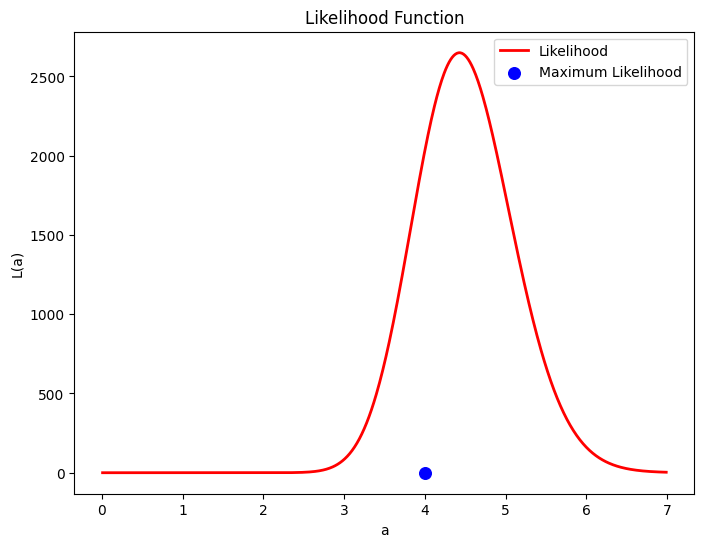

In [388]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta


n =25
a= 4
b =3

x = np.random.beta(a,b,n)

def Lik(param):
    # Calculate the product of the beta density function over x
    return np.prod(beta.pdf(x, param, b))

# Define the range of 'a' values
a_vals = np.arange(0.01, 7, 0.01)

vals = []

for i in a_vals:
    vals.append(Lik(i))



# Plotting the likelihood function
plt.figure(figsize=(8, 6))
plt.plot(a_vals, vals, color='red', linewidth=2, label='Likelihood')
plt.scatter(a, 0, color='blue', marker='o', s=70, label='Maximum Likelihood')
plt.xlabel('a')
plt.ylabel('L(a)')
plt.title('Likelihood Function')
plt.legend()
plt.show()


#### d)

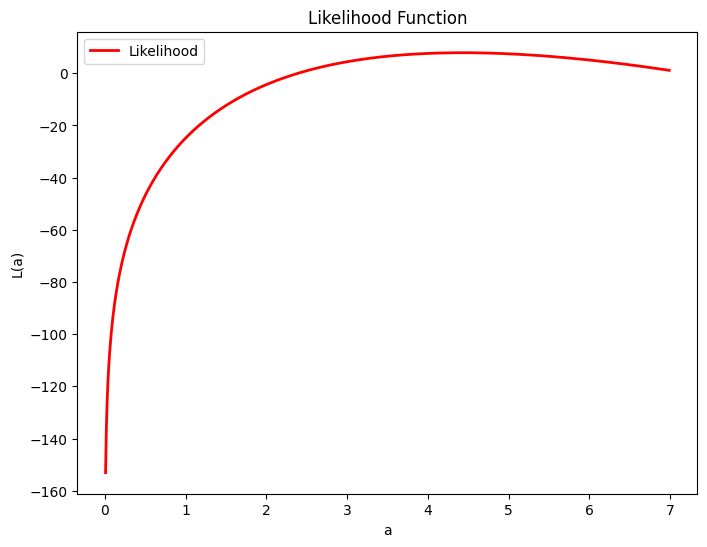

In [390]:
def Loglik(param):
    return np.log(np.prod(beta.pdf(x, param, b)))

a_vals = np.arange(0.01, 7, 0.01)

vals = []

for i in a_vals:
    vals.append(Loglik(i))



# Plotting the likelihood function
plt.figure(figsize=(8, 6))
plt.plot(a_vals, vals, color='red', linewidth=2, label='Likelihood')
#plt.scatter(a, 0, color='blue', marker='o', s=70, label='Maximum Likelihood')
plt.xlabel('a')
plt.ylabel('L(a)')
plt.title('Likelihood Function')
plt.legend()
plt.show()




    

#### e)

In the following, we construct the negative log likelihood function as a function of 𝑎.

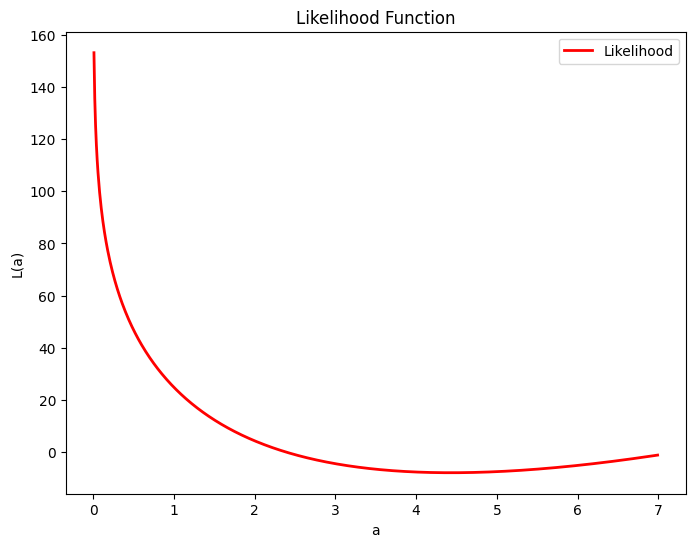

In [393]:
def negLoglik(param):
    return -np.log(np.prod(beta.pdf(x, param, b)))

a_vals = np.arange(0.01, 7, 0.01)

vals = []

for i in a_vals:
    vals.append(negLoglik(i))



# Plotting the likelihood function
plt.figure(figsize=(8, 6))
plt.plot(a_vals, vals, color='red', linewidth=2, label='Likelihood')
#plt.scatter(a, 0, color='blue', marker='o', s=70, label='Maximum Likelihood')
plt.xlabel('a')
plt.ylabel('L(a)')
plt.title('Likelihood Function')
plt.legend()
plt.show()

#### f)

Minimization of the negative of the log likelihood function using the optim() function available in
R/ use equivalent in the python.


In [403]:
import scipy.optimize as spo
initial_guess = 1

result = spo.minimize(negLoglik, initial_guess, method="BFGS")

a_hat = result.x
print(a_hat[0])

4.429315560635664


#### g - i)

Ther reader in encouraged to repeat the steps (a) – (f) 𝑀 = 100 times and obtain the sampling
distribution of the MLE 𝑎̂ of 𝑎 and check the consistency, asymptotic normality etc.

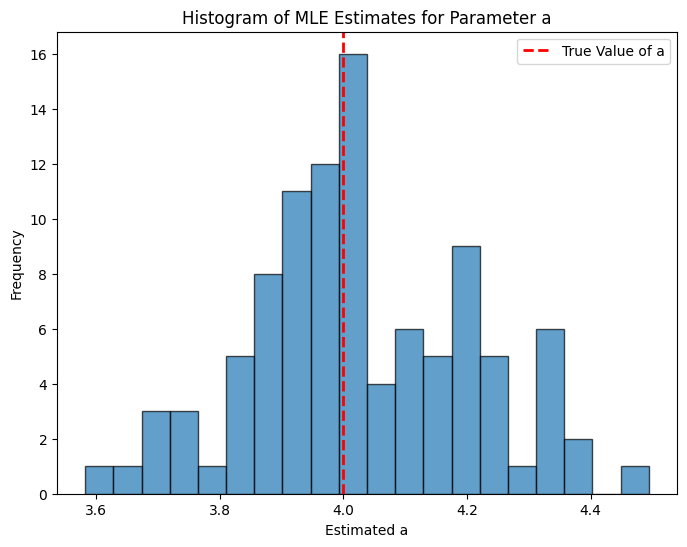

In [405]:
#sampling distribution 

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.optimize import minimize

# Parameters
n = 250
a = 4
b = 3

# Define negative log-likelihood function
def negLoglik(param, x, b):
    return -np.sum(np.log(beta.pdf(x, param, b)))

# Function to perform MLE for one sample
def estimate_a(x, b):
    initial_guess = 1.0
    result = minimize(negLoglik, initial_guess, args=(x, b), method='BFGS')
    return result.x[0]

# Simulate multiple samples and estimate 'a' for each
np.random.seed(0)  # Setting seed for reproducibility
num_samples = 100
a_hat = []

for i in range(num_samples):
    # Generate a random sample from a beta distribution
    x = np.random.beta(a, b, n)
    # Estimate 'a' using MLE
    estimated_a = estimate_a(x, b)
    a_hat.append(estimated_a)

# Plot histogram of estimated 'a' values
plt.figure(figsize=(8, 6))
plt.hist(a_hat, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(a, color='red', linestyle='dashed', linewidth=2, label='True Value of a')
plt.xlabel('Estimated a')
plt.ylabel('Frequency')
plt.title('Histogram of MLE Estimates for Parameter a')
plt.legend()
plt.show()





#### g)- ii) 

In the
following code, we draw the sampling distribution of the MLE for different sample sizes based on
𝑀 = 100 replications.

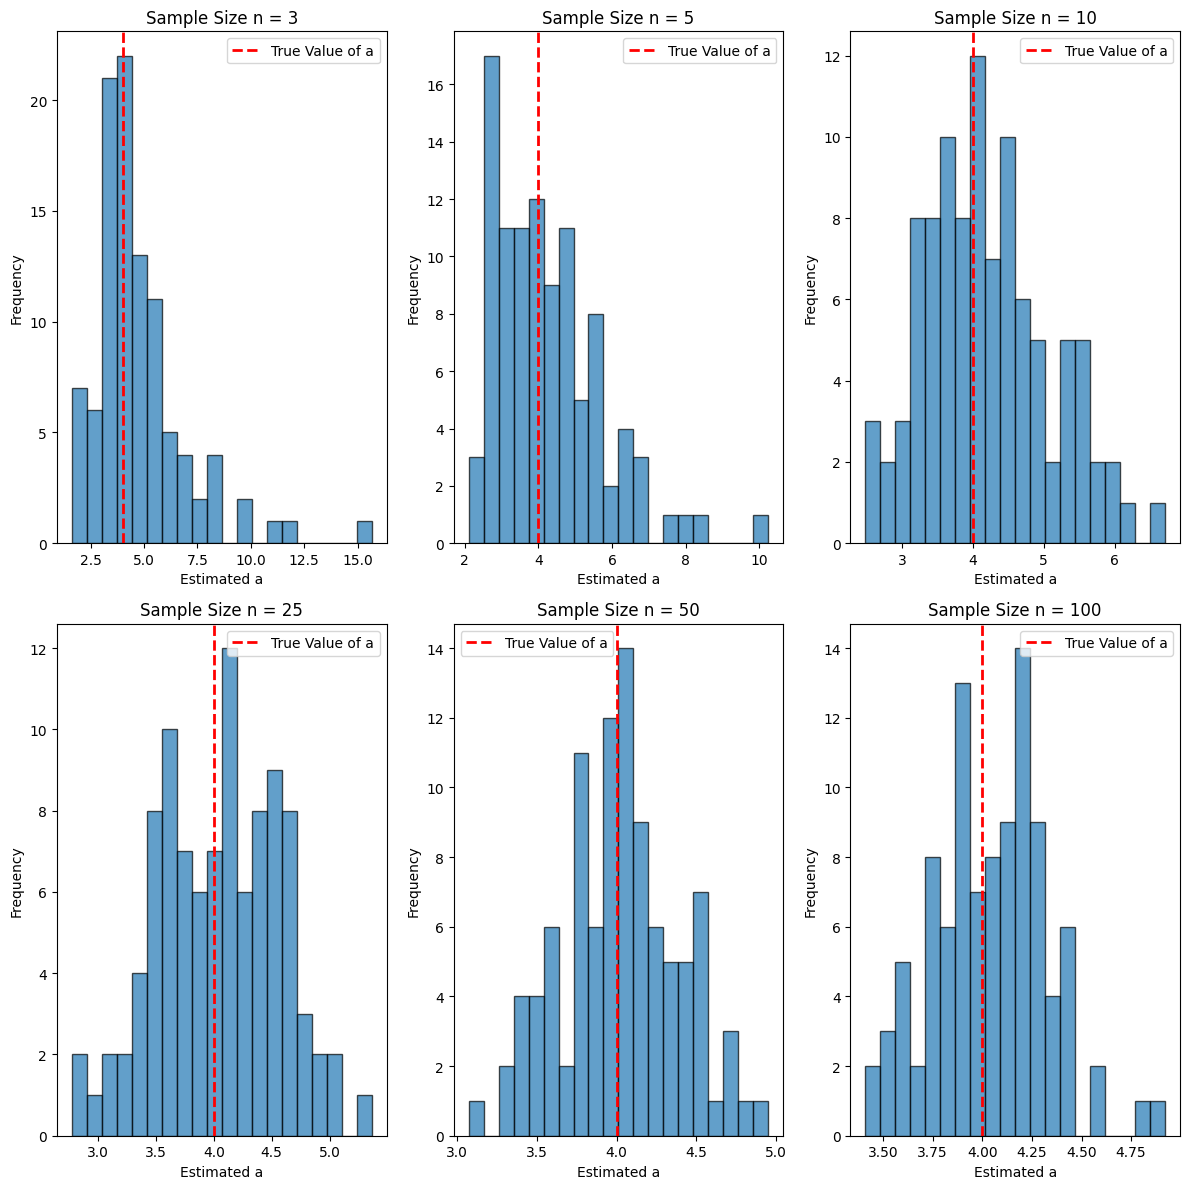

In [406]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.optimize import minimize

# Parameters
a = 4
b = 3
M = 100  # Number of iterations for each sample size
n_vals = [3, 5, 10, 25, 50, 100]  # List of sample sizes

# Define negative log-likelihood function
def negLoglik(param, x, b):
    return -np.sum(np.log(beta.pdf(x, param, b)))

# Function to perform MLE for one sample
def estimate_a(x, b):
    initial_guess = 1.0
    result = minimize(negLoglik, initial_guess, args=(x, b), method='BFGS')
    return result.x[0]

# Create subplots for different sample sizes
plt.figure(figsize=(12, 12))

for i, n in enumerate(n_vals):
    a_hat = []
    for _ in range(M):
        x = np.random.beta(a, b, n)
        a_hat.append(estimate_a(x, b))
    
    # Plot histogram of estimated 'a' values for current sample size
    plt.subplot(2, 3, i + 1)
    plt.hist(a_hat, bins=20, edgecolor='black', alpha=0.7)
    plt.axvline(a, color='red', linestyle='dashed', linewidth=2, label='True Value of a')
    plt.xlabel('Estimated a')
    plt.ylabel('Frequency')
    plt.title(f'Sample Size n = {n}')
    plt.legend()

plt.tight_layout()
plt.show()

        

        

#### h)

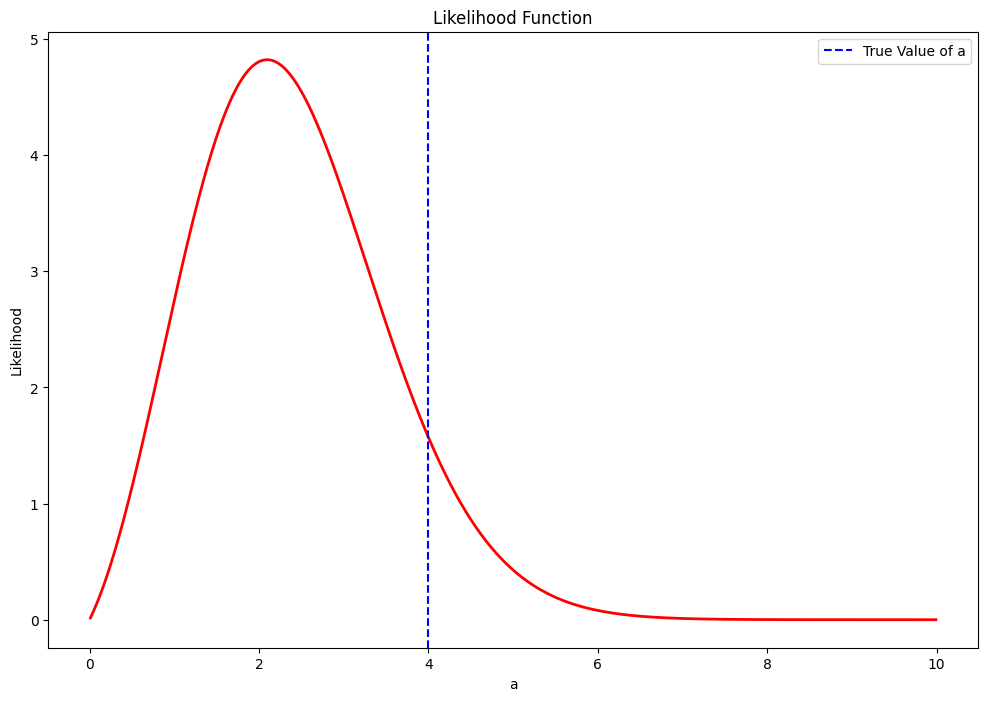

In [407]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters
n = 25
a = 4
b = 3

# Simulate data from a beta distribution
x = np.random.beta(a, b, size=n)

# Define the new likelihood function
def new_Lik(param):
    #max_x = np.max(x)
    return n * (beta.cdf(np.max(x), param, b))**(n-1) * beta.pdf(np.max(x), param, b)

# Range of 'a' values
a_vals = np.arange(0.01, 10, 0.01)

vals = []
for i in a_vals:
    vals.append(new_Lik(i))

# Plot likelihood function
plt.figure(figsize=(12, 8))

plt.plot(a_vals, vals, color='red', linewidth=2)
plt.xlabel('a')
plt.ylabel('Likelihood')
plt.title('Likelihood Function')
plt.axvline(a, color='blue', linestyle='--', label='True Value of a')
plt.legend()

plt.show()

    

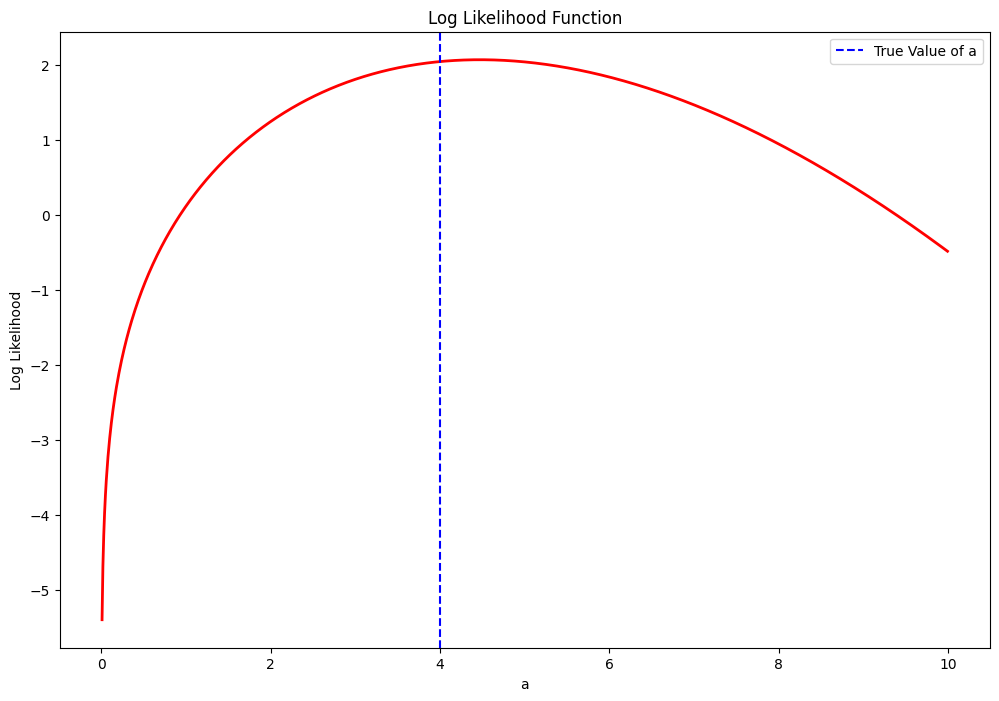

In [408]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters
n = 25
a = 4
b = 3

# Simulate data from a beta distribution
x = np.random.beta(a, b, size=n)

# Define the new logarithm of likelihood function
def log_new_Lik(param):
    max_x = np.max(x)
    lik = n * (beta.cdf(max_x, param, b))**(n-1) * beta.pdf(max_x, param, b)
    return np.log(lik)

# Range of 'a' values
a_vals = np.arange(0.01, 10, 0.01)

# Calculate logarithm of likelihood values for each 'a' value
vals = [log_new_Lik(param) for param in a_vals]

# Plot logarithm of likelihood function
plt.figure(figsize=(12, 8))
plt.plot(a_vals, vals, color='red', linewidth=2)
plt.xlabel('a')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood Function')
plt.axvline(a, color='blue', linestyle='--', label='True Value of a')
plt.legend()
plt.show()

    

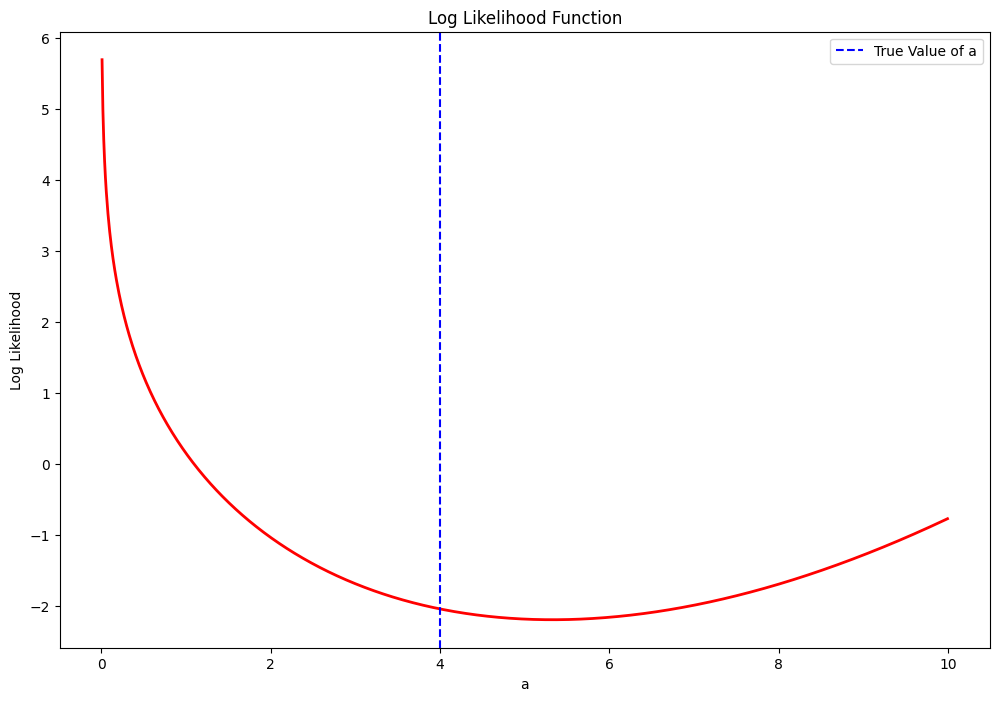

In [410]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters
n = 25
a = 4
b = 3

# Simulate data from a beta distribution
x = np.random.beta(a, b, size=n)

# Define the new logarithm of likelihood function
def neglog_new_Lik(param):
    max_x = np.max(x)
    lik = n * (beta.cdf(max_x, param, b))**(n-1) * beta.pdf(max_x, param, b)
    return -1*np.log(lik)

# Range of 'a' values
a_vals = np.arange(0.01, 10, 0.01)

# Calculate logarithm of likelihood values for each 'a' value
vals = [neglog_new_Lik(param) for param in a_vals]

# Plot logarithm of likelihood function
plt.figure(figsize=(12, 8))
plt.plot(a_vals, vals, color='red', linewidth=2)
plt.xlabel('a')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood Function')
plt.axvline(a, color='blue', linestyle='--', label='True Value of a')
plt.legend()
plt.show()

    

#### i)

The reader is encouraged to plot both likelihood functions ℒ(𝑎) and ℒ1(𝑎) in a single plot window.
Mark the MLEs obtained by maximizing ℒ(𝑎) and ℒ1(𝑎) using red and magenta colour,
respectively. For your reference in the above figure, the point at which ℒ1(𝑎) is maximum is
marked with vertical magenta colour dotted line.

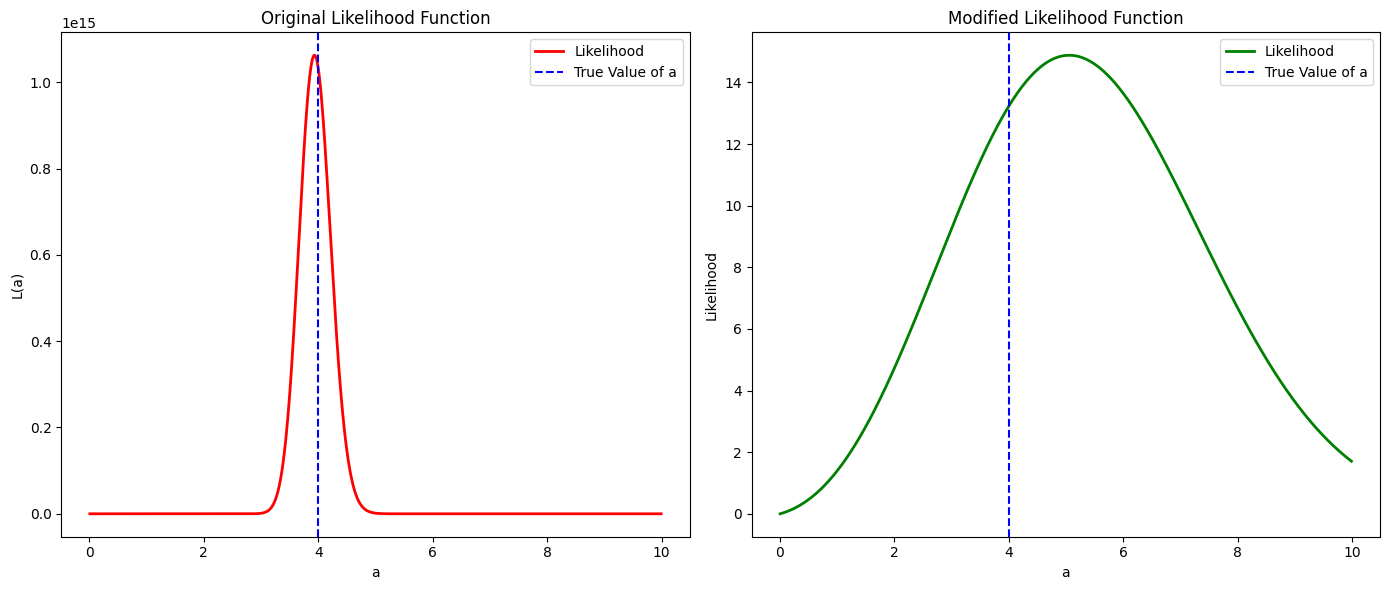

In [441]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters
n = 100
a = 4
b = 3

np.random.seed(53)
# Simulate data from a beta distribution
x = np.random.beta(a, b, size=n)

# Define the original likelihood function
def Lik(param):
    return np.prod(beta.pdf(x, param, b))

# Define the new likelihood function
def new_Lik(param):
    max_x = np.max(x)
    return n * (beta.cdf(max_x, param, b))**(n-1) * beta.pdf(max_x, param, b)

# Range of 'a' values
a_vals = np.arange(0.01, 10, 0.01)

# Compute likelihood values for both functions
vals_orig = [Lik(i) for i in a_vals]
vals_new = [new_Lik(i) for i in a_vals]

# Plotting subplots of the likelihood functions
plt.figure(figsize=(14, 6))

# Plot 1: Original Likelihood Function
plt.subplot(1, 2, 1)
plt.plot(a_vals, vals_orig, color='red', linewidth=2, label='Likelihood')
plt.axvline(a, color='blue', linestyle='--', label='True Value of a')
plt.xlabel('a')
plt.ylabel('L(a)')
plt.title('Original Likelihood Function')
plt.legend()

# Plot 2: New Likelihood Function
plt.subplot(1, 2, 2)
plt.plot(a_vals, vals_new, color='green', linewidth=2, label='Likelihood')
plt.axvline(a, color='blue', linestyle='--', label='True Value of a')
plt.xlabel('a')
plt.ylabel('Likelihood')
plt.title('Modified Likelihood Function')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


#### j)

A natural question arises, whether the MLE of 𝑎, obtained maximizing ℒ1(𝑎) is a consistent
estimator of 𝑎 or not. In the following, we check the same. Basically, for each 𝑛, we simulate a
sample of size 𝑛 and obtain the MLE 𝑎𝑛̂ (say) by minimizing − log ℒ1(𝑎). Plot the MLEs as a
function of 𝑛

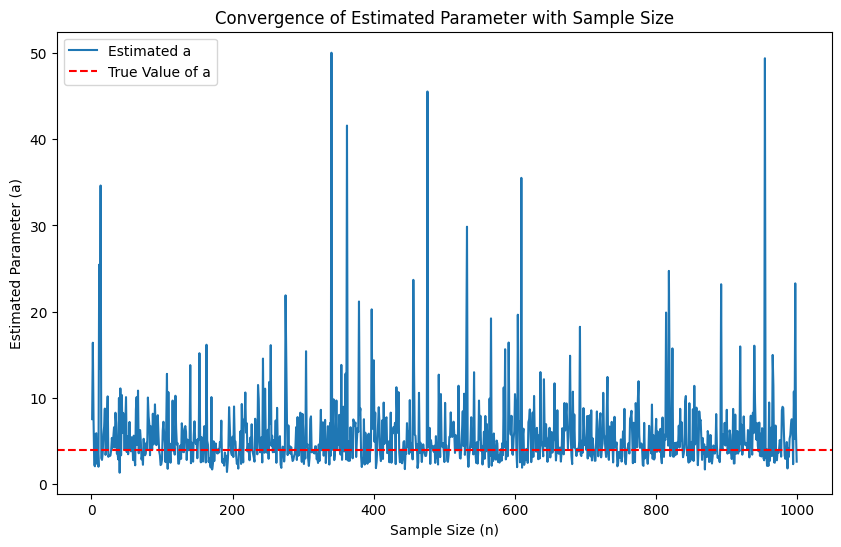

In [442]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.optimize import minimize

# Parameters
a = 4
b = 3

# Define the negative log likelihood function
def neglog_new_Lik(param, x, b):
    max_x = np.max(x)
    lik = len(x) * (beta.cdf(max_x, param, b))**(len(x)-1) * beta.pdf(max_x, param, b)
    return -np.log(lik)

# Generate a range of sample sizes
n_vals = np.arange(1, 1000, 1)

# Store the estimated 'a' values for each sample size
a_hat = []

# Loop over each sample size and estimate 'a' using MLE
for n in n_vals:
    x = np.random.beta(a, b, n)
    initial_guess = 1
    result = minimize(neglog_new_Lik, initial_guess, args=(x, b), method="BFGS")
    a_hat.append(result.x[0])

# Plot the estimated 'a' values against the sample sizes
plt.figure(figsize=(10, 6))
plt.plot(n_vals, a_hat, label="Estimated a")
plt.axhline(a, color='red', linestyle='--', label="True Value of a")
plt.xlabel('Sample Size (n)')
plt.ylabel('Estimated Parameter (a)')
plt.title('Convergence of Estimated Parameter with Sample Size')
plt.legend()
plt.show()


#### K) 

In [ ]:
We now check whether the sampling distribution of 𝑎𝑛̂ is approximately normal as 𝑛 → ∞. The
reader is expected to change the values of 𝑛 and check out the shapes of the histograms.
Histograms are drawn based on 𝑀 = 1000 sampling of size 𝑛 from the Beta(𝑎, 3) population
distribution. The sample size 𝑛 is assumed to take values from the set {5,10,30,50,100, 200}.

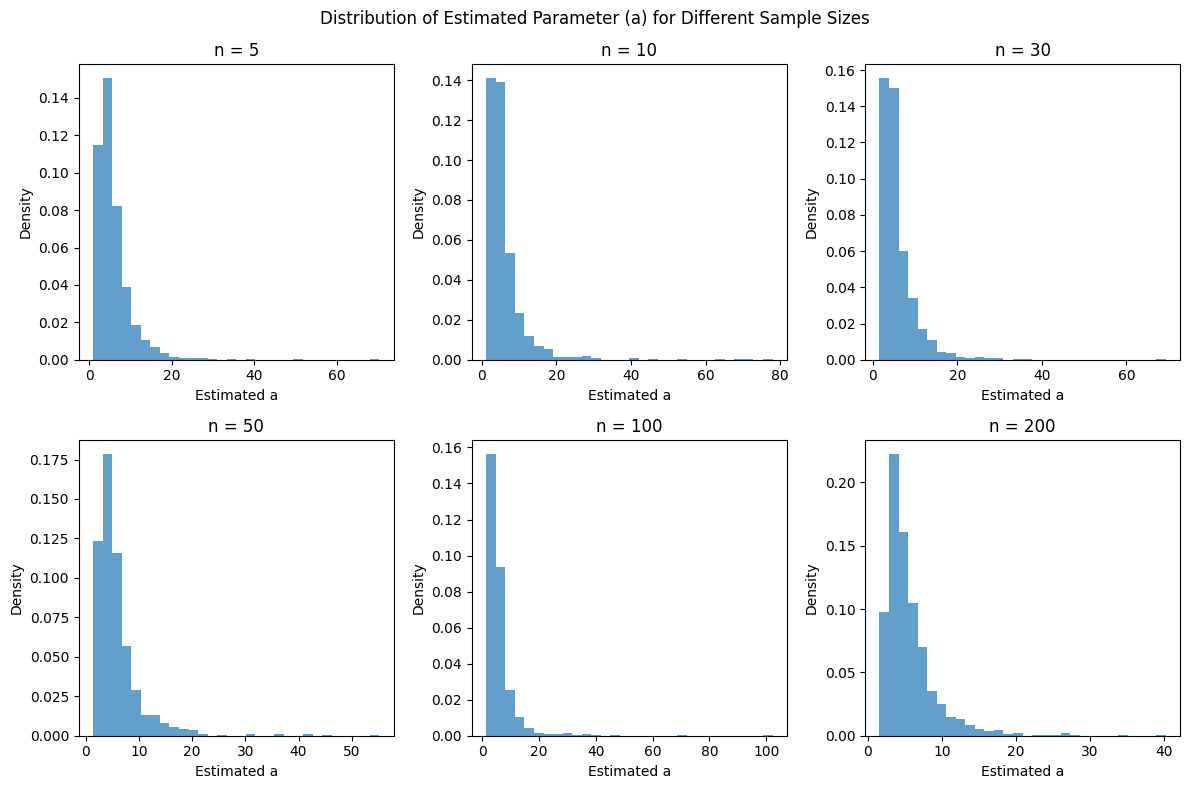

In [443]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.optimize import minimize

# Parameters
a = 4
b = 3
n_vals = [5, 10, 30, 50, 100, 200]
M = 1000

# Define the negative log likelihood function
def neglog_new_Lik(param, x, b):
    max_x = np.max(x)
    lik = len(x) * (beta.cdf(max_x, param, b))**(len(x)-1) * beta.pdf(max_x, param, b)
    return -np.log(lik)

# Iterate over each sample size in n_vals
plt.figure(figsize=(12, 8))
for i, n in enumerate(n_vals):
    a_hat = []
    for _ in range(M):
        # Generate a sample of size n from the beta distribution
        x = np.random.beta(a, b, n)
        # Perform MLE to estimate 'a' for the current sample
        initial_guess = 1
        result = minimize(neglog_new_Lik, initial_guess, args=(x, b), method="BFGS")
        a_hat.append(result.x[0])
    
    # Plot histogram of estimated 'a' values for the current sample size
    plt.subplot(2, 3, i + 1)
    plt.hist(a_hat, density=True, bins=30, alpha=0.7)
    plt.title(f'n = {n}')
    plt.xlabel('Estimated a')
    plt.ylabel('Density')

plt.suptitle('Distribution of Estimated Parameter (a) for Different Sample Sizes')
plt.tight_layout()
plt.show()


#### m - a)

Simulation of the first data set (SET – I), (𝑋1, 𝑋2, ⋯ , 𝑋𝑛) and (SET – II), (𝑌1, 𝑌2, ⋯ , 𝑌𝑚)

In [2]:
import numpy as np
n =20
a = 4
b = 3

x = np.random.beta(a,b,n)
m = 20
y = np.random.beta(a,b,m)


#### m - b)

Definition of ℒ1(𝑎) and ℒ2(𝑎)

In [4]:
def Lik1(param):
    max_x = np.max(x)
    lik = n * (beta.cdf(max_x, param, b))**(n-1) * beta.pdf(max_x, param, b)
    return lik
# theory is in the notes take care of it

def Lik2(param):
    min_y = np.min(y)
    lik = m * (1 - beta.cdf(min_y, param, b))**(m-1) * beta.pdf(min_y, param, b)
    return lik



#### m - c)

Definition of the Combined likelihood ℒ(𝑎):

In [7]:
def combinedlike(param):
    L_1 = n * (beta.cdf(np.max(x), param, b))**(n-1) * beta.pdf(np.max(x), param, b) 
    L_2 = m * (1 - beta.cdf(np.min(y), param, b))**(m-1) * beta.pdf(np.min(y), param, b)
    return L_1*L_2




#### m - d)

Plot the combined likelihood function and mark the true value of 𝑎 using which the data
simulation has been carried out.

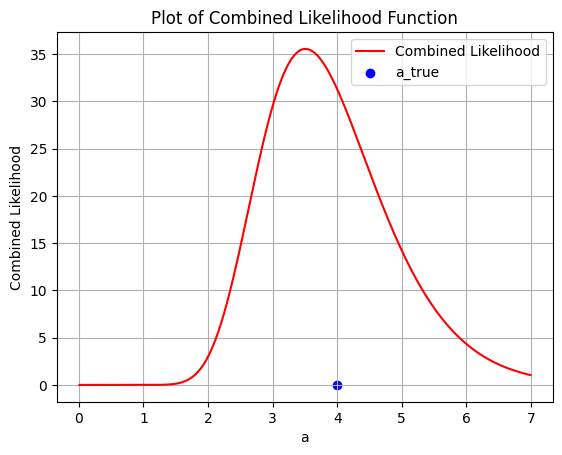

In [8]:
a_vals = np.arange(0.01,7,0.01)

vals = []

for i in a_vals:
    vals.append(combinedlike(i))

plt.plot(a_vals,vals,color = 'red', label = 'Combined Likelihood')
plt.scatter(a,0,color = 'blue',label= 'a_true')
# Customize plot labels and title
plt.xlabel('a')
plt.ylabel('Combined Likelihood')
plt.title('Plot of Combined Likelihood Function')
plt.legend()
plt.grid(True)
plt.show()

#### m-f)

Computation of the MLE of 𝑎 using the combined likelihood function ℒ(𝑎) using the optim()
function available in R. We first define the negative combined log likelihood function which
will be passed as an argument of the optim() function. (use equivalent function in python)

In [9]:
import numpy as np
from scipy.stats import beta
from scipy.optimize import minimize

def combinedNegloglike(param, x, y, b, n, m):
    # Calculate likelihood component L_1 based on data x
    L_1 = n * (beta.cdf(np.max(x), param, b))**(n-1) * beta.pdf(np.max(x), param, b)
    
    # Calculate likelihood component L_2 based on data y
    L_2 = m * (1 - beta.cdf(np.min(y), param, b))**(m-1) * beta.pdf(np.min(y), param, b)
    
    # Combine likelihood components
    likelihood = L_1 * L_2
    
    return -np.log(likelihood)  # Return the negative log likelihood for minimization

# Parameters and data
a = 4
b = 3
n = 20
m = 20

# Generate random data from beta distributions
x = np.random.beta(a, b, n)
y = np.random.beta(a, b, m)

# Initial guess for the optimization
initial_guess = 1

# Perform MLE to estimate the parameter 'param'
result = minimize(combinedNegloglike, initial_guess, args=(x, y, b, n, m), method="BFGS")

# Extract the estimated parameter from the optimization result
a_hat = result.x[0]

print("Estimated parameter (a_hat):", a_hat)


Estimated parameter (a_hat): 4.968277836102095


#### m-g)

Let us investigate the sampling distribution of the MLE of 𝑎 obtained from the combined
likelihood ℒ(𝑎). We repeat the estimation for 𝑀 = 1000 times by generating training samples
𝑋′s and 𝑌′s from the Beta(𝑎, 3) population

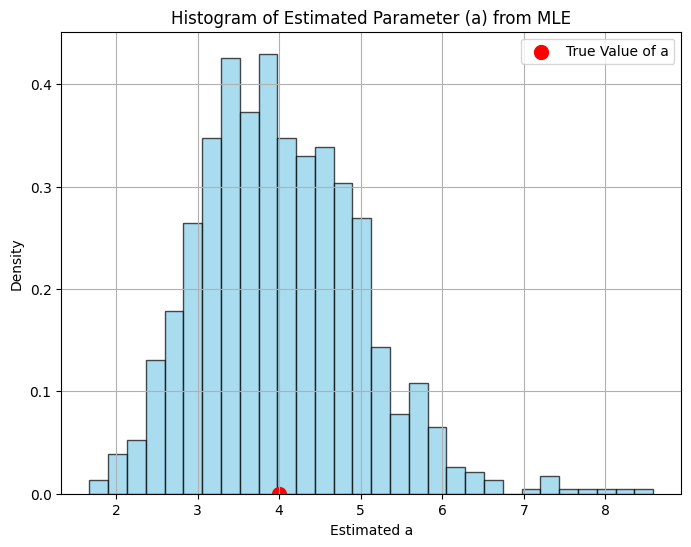

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.optimize import minimize

# Parameters
a = 4
b = 3
n = m = 20
M = 1000

# Define the combined negative log-likelihood function
def combinedNegloglike(param, x, y, b, n, m):
    L_1 = n * (beta.cdf(np.max(x), param, b))**(n-1) * beta.pdf(np.max(x), param, b)
    L_2 = m * (1 - beta.cdf(np.min(y), param, b))**(m-1) * beta.pdf(np.min(y), param, b)
    return -np.log(L_1 * L_2)

# Collect estimated 'a' values across iterations
a_hat = []
for i in range(M):  # Loop from 0 to M-1
    # Generate new datasets x and y from beta distributions
    x = np.random.beta(a, b, n)
    y = np.random.beta(a, b, m)
    
    # Initial guess for the optimization
    initial_guess = 1
    
    # Perform maximum likelihood estimation (MLE) using minimize
    result = minimize(combinedNegloglike, initial_guess, args=(x, y, b, n, m), method='BFGS')
    
    # Append the estimated 'a' value to the list
    a_hat.append(result.x[0])

# Plot a histogram of estimated 'a' values
plt.figure(figsize=(8, 6))
plt.hist(a_hat, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')

# Mark the true value of 'a' on the plot
plt.scatter(a, 0, color='red', label="True Value of a", s=100, marker='o')

# Customize plot labels and title
plt.xlabel('Estimated a')
plt.ylabel('Density')
plt.title('Histogram of Estimated Parameter (a) from MLE')
plt.legend()
plt.grid(True)
plt.show()


#### m-h)

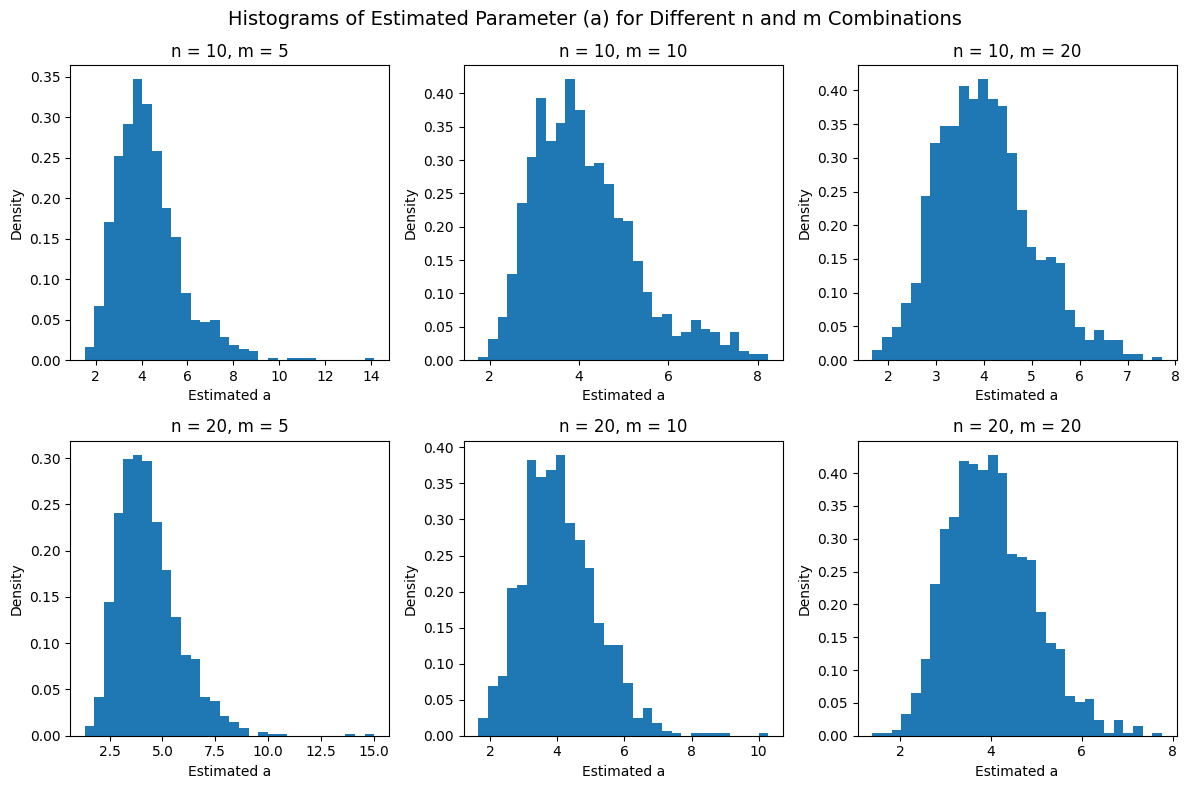

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.optimize import minimize

# Parameters
a = 4
b = 3
n_vals = [10, 20]
m_vals = [5, 10, 20]
M = 1000

def combinedNegloglike(param, x, y, b, n, m):
    L_1 = n * (beta.cdf(np.max(x), param, b))**(n-1) * beta.pdf(np.max(x), param, b)
    L_2 = m * (1 - beta.cdf(np.min(y), param, b))**(m-1) * beta.pdf(np.min(y), param, b)
    return -np.log(L_1 * L_2)

# Iterate over combinations of n_vals and m_vals
plt.figure(figsize=(12, 8))
subplot_idx = 1
for k in range(len(n_vals)):
    n = n_vals[k]
    for l in range(len(m_vals)):  # Iterate over indices of m_vals
        m = m_vals[l]
        
        # Collect estimated 'a' values across iterations
        a_hat = []
        for i in range(M): 
            x = np.random.beta(a, b, n)
            y = np.random.beta(a, b, m)
            
            # Initial guess for the optimization
            initial_guess = 1
            
            # Perform maximum likelihood estimation (MLE) using minimize
            result = minimize(combinedNegloglike, initial_guess, args=(x, y, b, n, m), method='BFGS')
            
            # Append the estimated 'a' value to the list
            a_hat.append(result.x[0])
        
        # Plot histogram in the appropriate subplot
        plt.subplot(len(n_vals), len(m_vals), subplot_idx)
        plt.hist(a_hat, bins=30, density=True)
        plt.title(f'n = {n}, m = {m}')
        plt.xlabel('Estimated a')
        plt.ylabel('Density')
        
        subplot_idx += 1

plt.suptitle('Histograms of Estimated Parameter (a) for Different n and m Combinations', fontsize=14)
plt.tight_layout()
plt.show()
